# Introduction

`neurodiffeq` is a package for solving differential equations with neural networks. Differential equations are equations that relate some function with its derivatives. They emerge in various scientific and engineering domains. Traditionally these problems can be solved by numerical methods (e.g. finite difference, finite element). While these methods are effective and adequate, their solutions are discrete. It would be interesting if we can compute solutions for differential equations that are continuous and differentiable.

As universal function approximators, artificial neural networks have been shown to have the potential to solve ordinary differential equations (ODEs) and partial differential equations (PDEs) with certain initial/boundary conditions. The aim of `neurodiffeq` is to implement these existing techniques of using ANN to solve differential equations in a way that allow the software to be flexible enough to work on a wide range of user-defined problems.

# 1. Differential Equations

Differential equations can be divided into 2 types: ordinary differential equations (ODEs) and partial differential equations (PDEs).

## 1.1 Ordinary Differential Equations
An ordinary differential equation (ODE) is an differential equation that contains only one independent variable (a scalar). Let $t \in \mathbb{R}$ be the independent variable and $x(t): \mathbb{R} \mapsto \mathbb{R}$ be a function of $t$. An ordinary differential equation of order $n$ takes the form:

$$F(t, x, \frac{dx}{dt}, \frac{d^2x}{dt^2}, \ldots, \frac{d^nx}{dt^n}) = 0,$$

A general solution of an $n$th-order equation is a solution containing $n$ arbitrary independent constants of integration. A particular solution is derived from the general solution by setting the constants to particular values. This is often done by imposing an initial condition or boundary condition to the ODE. The former corresponds to an initial value problem (IVP) and the latter a boundary value problem (BVP).

### 1.1.1 Initial Value Problems

For the following ODE: 

$$F(t, x, \frac{dx}{dt}, \frac{d^2x}{dt^2}, \ldots, \frac{d^nx}{dt^n}) = 0,$$

If we specify that 

$$x(t_0) = x_0,$$

then we have an initial value problem. Initial value problem can be seen as the question of how $x$ will evolve with time given $x=x_0$ at time $t=t_0$. 

### 1.1.2 Boundary Value Problems

A boundary value problem has conditions specified at the boundaries of the independent variables. In the context of ordinary differential equations, a boundary problem is one that put some restrictions on $x$ at the initial $t$ and final $t$. There are several kinds of boundary conditions.

For the following ODE: 

$$F(t, x, \frac{dx}{dt}, \frac{d^2x}{dt^2}, \ldots, \frac{d^nx}{dt^n}) = 0,$$

If we specify that 

$$x(t_{ini}) = f, \\
x(t_{fin}) = g,$$

then we have a Dirichlet boundary condition. 

If we specify that 

$$\frac{dx}{dt}|_{t = t_{ini}} = f, \\
\frac{dx}{dt}|_{t = t_{fin}} = g,$$

then we have a Neumann boundary condition. 

If we specify that 

$$x(t_{ini}) + \frac{dx}{dt}|_{t = t_{ini}} = f, \\
x(t_{fin}) + \frac{dx}{dt}|_{t = t_{fin}} = g,$$

then we have a Robin boundary condition. 

Boundary conditions of mixed types can also be specified on a different subset of the boundaries (In this case, that will be one boundary condition for $t = t_{ini}$ and another boundary condition of a different type for $t = t_{fin}$).

### 1.1.3 System of Ordinary Differential Equations

A number of coupled differential equations form a system of equations. Let $t \in \mathbb{R}$ be the independent variable and $\vec{x}(t): \mathbb{R} \mapsto \mathbb{R^m}$ be a function of $t$. A system of ordinary differential equations of order $n$ takes the form:

$$F(t, \vec{x}, \frac{d\vec{x}}{dt}, \frac{d^2\vec{x}}{dt^2}, \ldots, \frac{d^n\vec{x}}{dt^n}) = \vec{0},$$

This can be written in matrix form as 

$$
\begin{pmatrix} 
f_0(t, \vec{x}, \frac{d\vec{x}}{dt}, \frac{d^2\vec{x}}{dt^2}, \ldots, \frac{d^n\vec{x}}{dt^n}) \\
f_1(t, \vec{x}, \frac{d\vec{x}}{dt}, \frac{d^2\vec{x}}{dt^2}, \ldots, \frac{d^n\vec{x}}{dt^n}) \\
\vdots \\
f_{m-1}(t, \vec{x}, \frac{d\vec{x}}{dt}, \frac{d^2\vec{x}}{dt^2}, \ldots, \frac{d^n\vec{x}}{dt^n})
\end{pmatrix}
= 
\begin{pmatrix} 
0 \\
0 \\
\vdots \\
0
\end{pmatrix}
$$

## 1.2 Partial Differential Equations

---

# 2. Basic Usage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

## 2.1. Solving ODEs

ODEs can be solved by `neurodiffeq.ode.solve`. 

Just for the sake of notation in the following examples, here we see differentiation as an operation, then an ODE can be rewritten as 

$$F(x, t) = 0.$$

### 2.1.1 ODE Example 1: Exponential Decay

Start by solving 

$$\frac{dx}{dt} = -x.$$ 

for $x(t)$ with $x(0) = 1.0$. The analytical solution is 

$$
x = e^{-t}.
$$

For `neurodiffeq.ode.solve` to solve this ODE, the following parameters needs to be specified:

* `ode`: a function representing the ODE to be solved. It should be a function that maps $(x, t)$ to $F(x, t)$. Here we are solving $$F(x, t)=\dfrac{dx}{dt} + x=0,$$ then `ode` should be `lambda x, t: diff(x, t) - x`. `diff(x, t)` is the first order derivative of x with respect to t.

* `condition`: a `neurodiffeq.ode.Condition` instance representing the initial condition / boundary condition of the ODE. Here we use `IVP(t_0=0.0, x_0=1.0)` to ensure $x(0) = 1.0$.

* `t_min` and `t_max`: the domain of $t$ to solve the ODE on.

In [2]:
from neurodiffeq import diff      # the differentiation operation
from neurodiffeq.ode import solve # the ANN-based solver
from neurodiffeq.ode import IVP   # the initial condition

In [3]:
exponential = lambda x, t: diff(x, t) + x # specify the ODE
init_val_ex = IVP(t_0=0.0, x_0=1.0)       # specify the initial conditon

# solve the ODE
solution_ex, loss_ex = solve(ode=exponential, condition=init_val_ex, 
                       t_min=0.0, t_max=2.0)

`solve` returns a tuple, where the first entry is the solution as a function and the second entry is the loss history. The solution is a function that maps $t$ to $x$. It accepts `numpy.array` as input as well. The default return type of the solution is `torch.tensor`. If we wanted to return `numpy.array`, we can specify `as_type='np'`. the loss history is a dictionary, where the 'train' entry is the training loss and the 'valid' entry is the validation loss. Here we compare the ANN-based solution with the analytical solution:

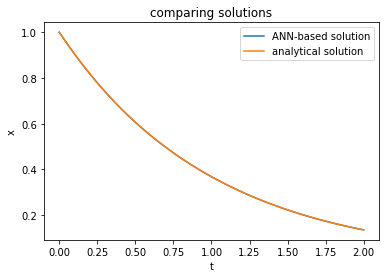

In [4]:
ts = np.linspace(0, 2.0, 100)
x_net = solution_ex(ts, as_type='np')
x_ana = np.exp(-ts)

plt.figure()
plt.plot(ts, x_net, label='ANN-based solution')
plt.plot(ts, x_ana, label='analytical solution')
plt.ylabel('x')
plt.xlabel('t')
plt.title('comparing solutions')
plt.legend()
plt.show()

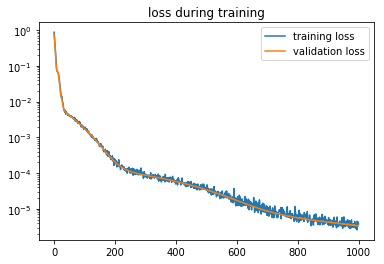

In [5]:
plt.figure()
plt.plot(loss_ex['train'], label='training loss')
plt.plot(loss_ex['valid'], label='validation loss')
plt.yscale('log')
plt.title('loss during training')
plt.legend()
plt.show()

We may want to see the check the solution and the loss function during solving the problem (training the network). To do this, we need to pass a `neurodiffeq.ode.Monitor` object to `solve`. A `Monitor` has the following parameters:

* `t_min` and `t_max`: the region of $t$ we want to monitor
* `check_every`: the frequency of visualization. If `check_every=100`, then the monitor will visualize the solution every 100 epochs.

`%matplotlib notebook` should be executed to allow `Monitor` to work. Here we solve the above ODE again.

In [6]:
from neurodiffeq.ode import Monitor

<IPython.core.display.Javascript object>


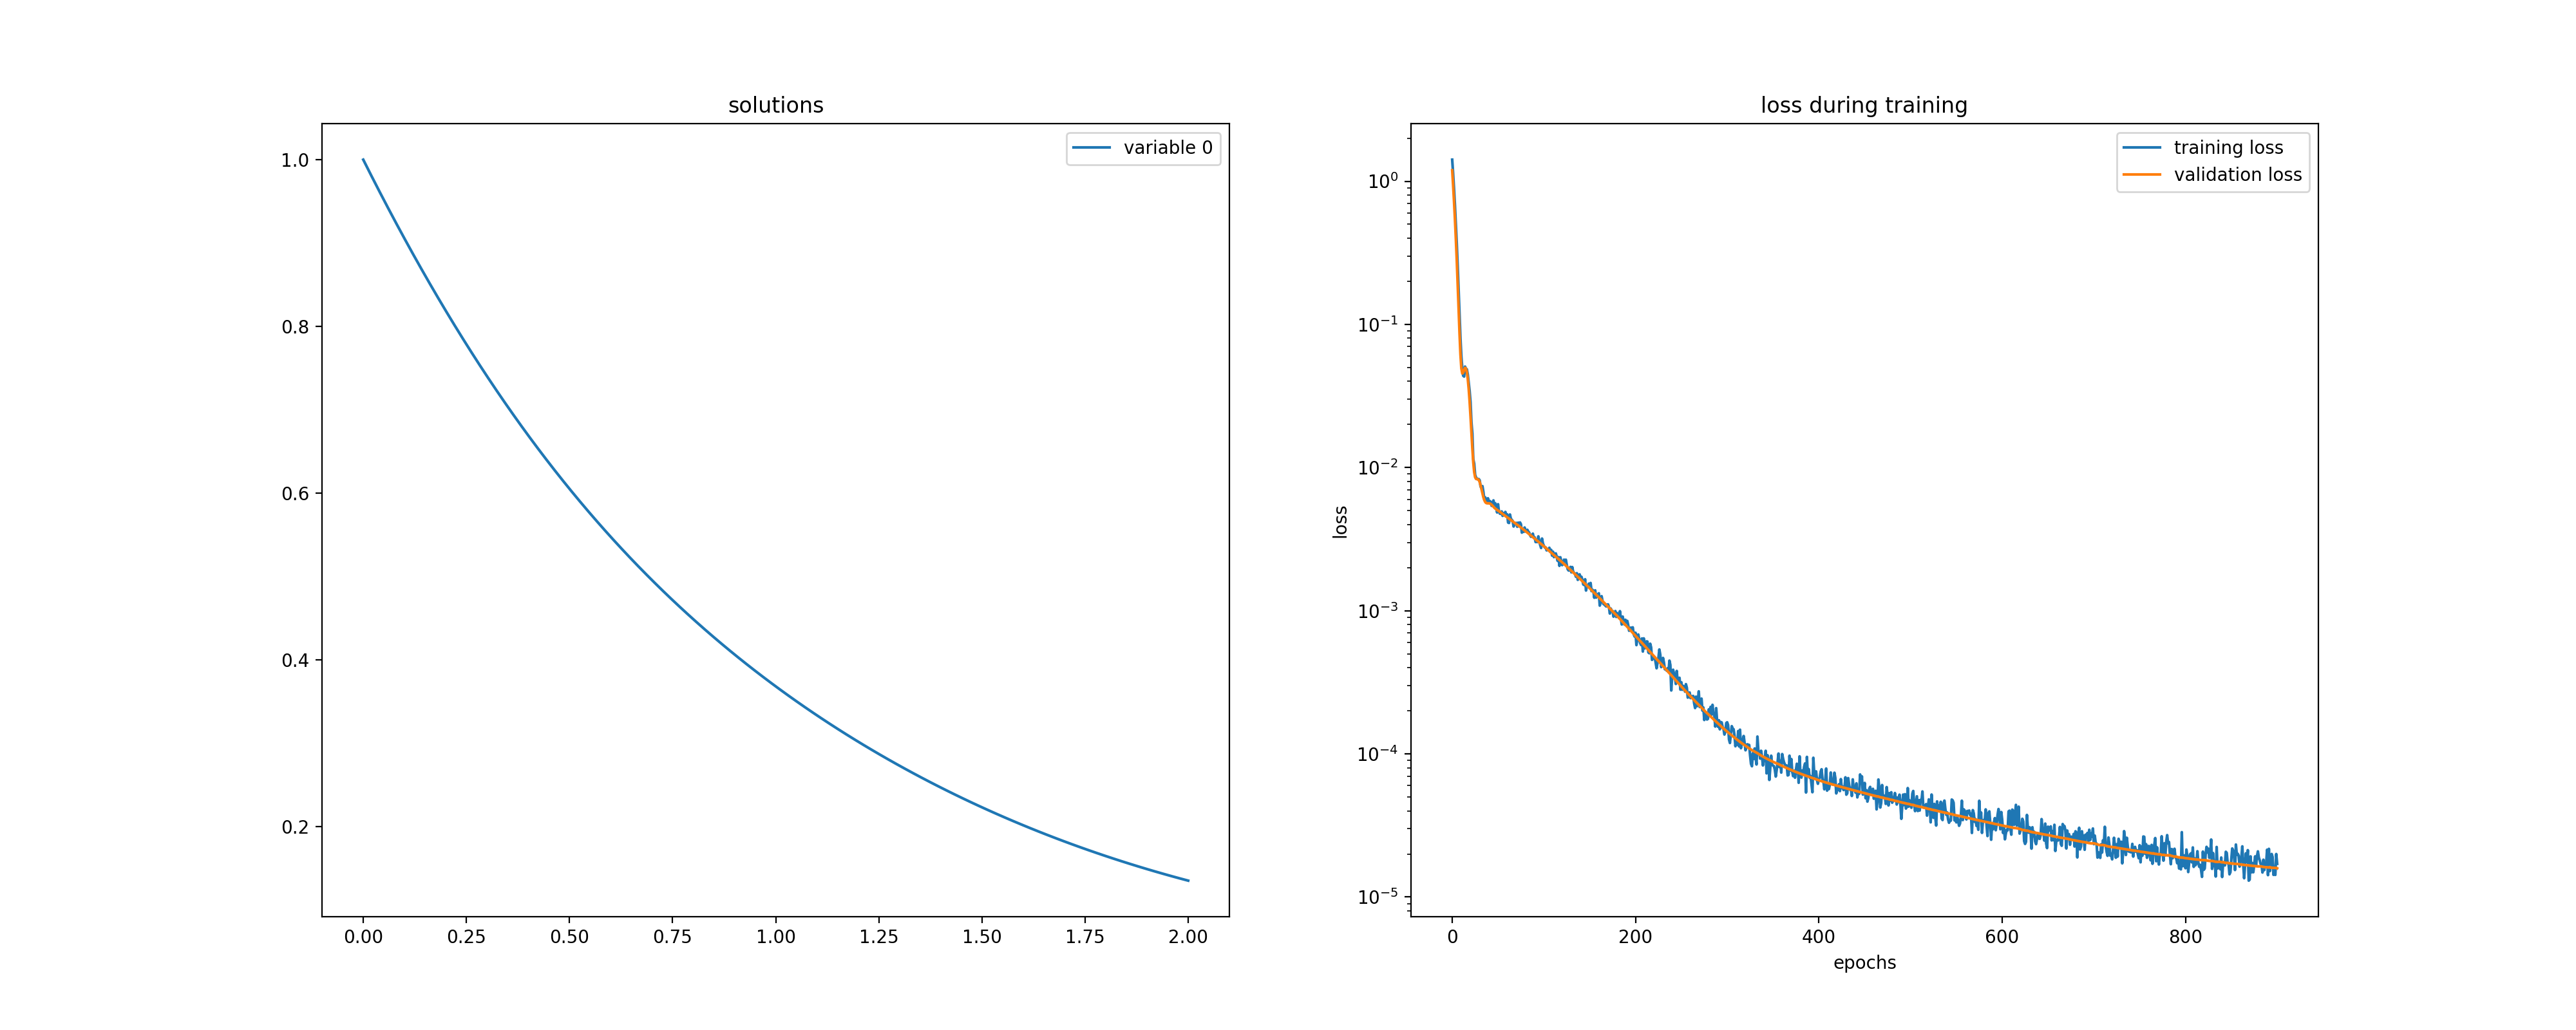

In [7]:
%matplotlib notebook
solution_ex, _ = solve(ode=exponential, condition=init_val_ex, 
                       t_min=0.0, t_max=2.0, 
                       monitor=Monitor(t_min=0.0, t_max=2.0, check_every=100))

### 2.1.2 ODE Example 2: Harmonic Oscilator

Here we solve a damped harmonic oscillator: 

$$
F(x, t) = \frac{d^2x}{dt^2} + x = 0
$$

for

$$
x(0) = 0.0, \frac{dx}{dt}|_{t=0} = 1.0
$$

The analytical solution is 

$$x = \sin(t)$$

We can include higher order derivatives in our ODE with the `order` keyword of `diff`, which is defaulted to 1.

Initial condition on $\dfrac{dx}{dt}$ can be specified with the `x_0_prime` keyword of `IVP`. 

Here we will use another keyword for `solve`:

* `max_epochs`: the number of epochs to run

<IPython.core.display.Javascript object>


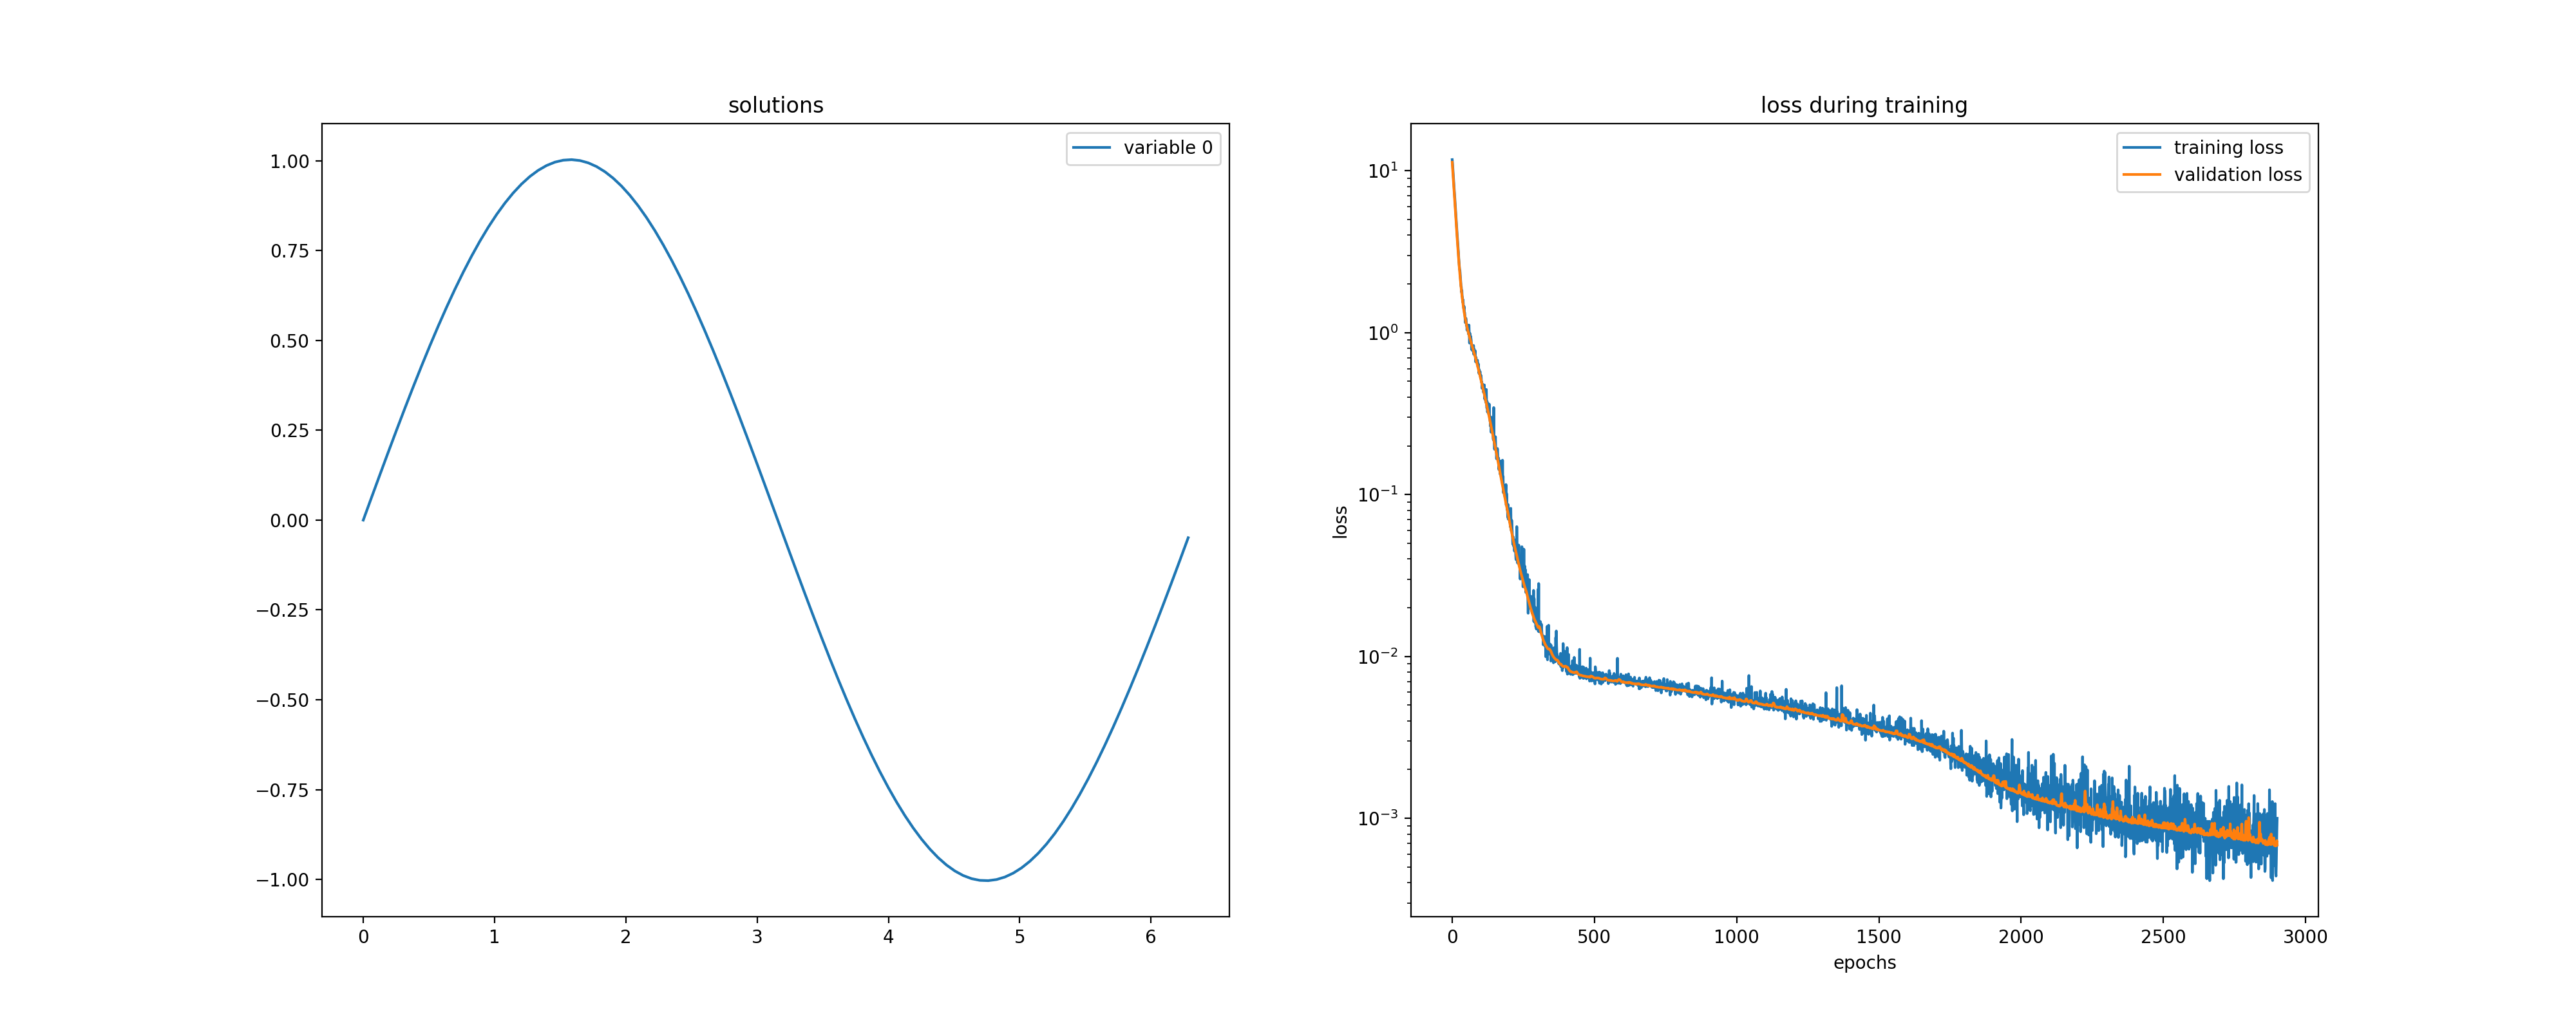

In [8]:
harmonic_oscillator = lambda x, t: diff(x, t, order=2) + x
init_val_ho = IVP(t_0=0.0, x_0=0.0, x_0_prime=1.0)

solution_ho, _ = solve(ode=harmonic_oscillator, condition=init_val_ho, 
                       t_min=0.0, t_max=2*np.pi, max_epochs=3000,
                       monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

<IPython.core.display.Javascript object>


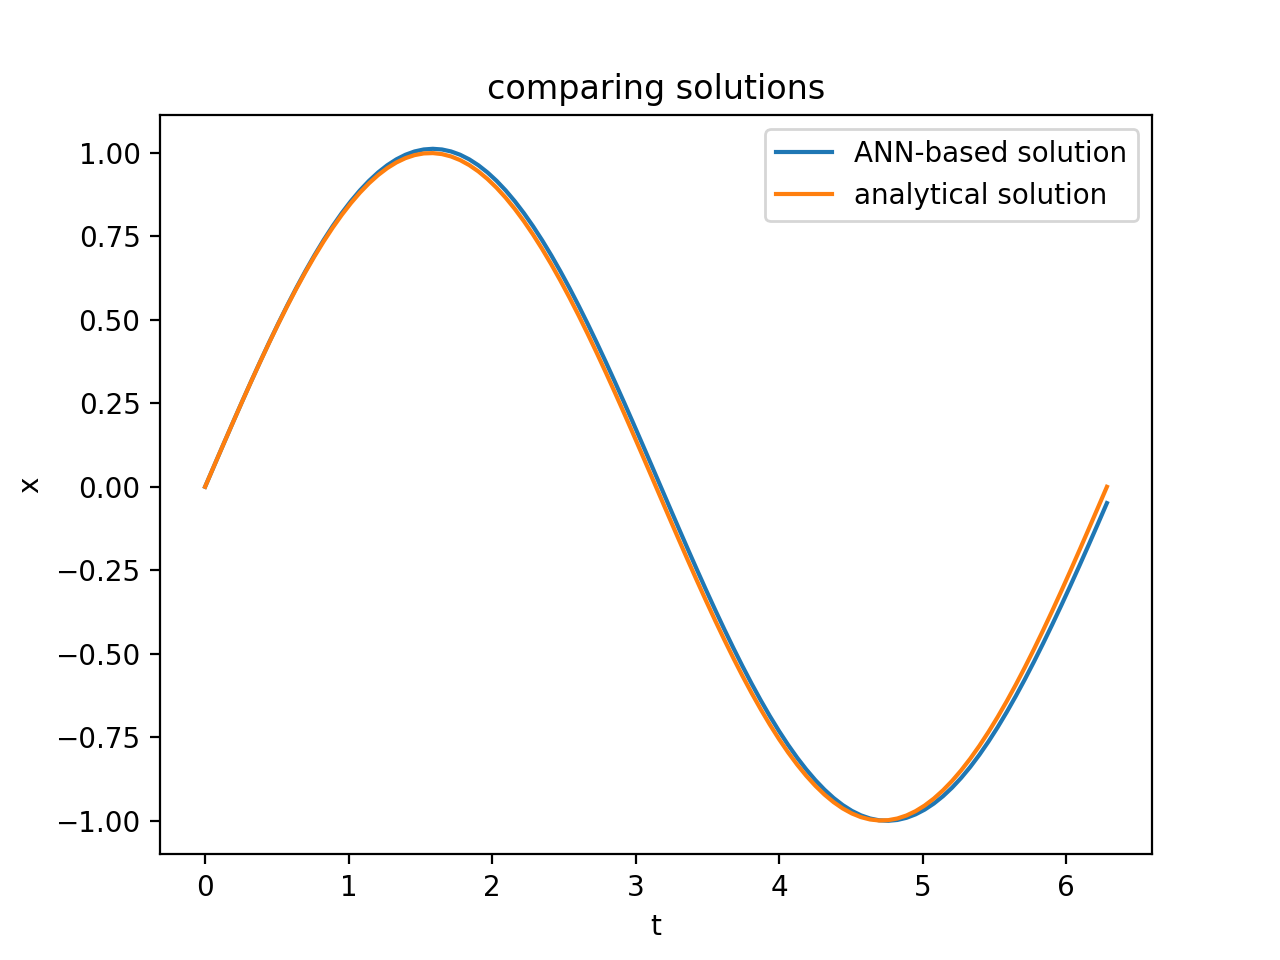

In [9]:
ts = np.linspace(0, 2*np.pi, 100)
x_net = solution_ho(ts, as_type='np')
x_ana = np.sin(ts)

plt.figure()
plt.plot(ts, x_net, label='ANN-based solution')
plt.plot(ts, x_ana, label='analytical solution')
plt.ylabel('x')
plt.xlabel('t')
plt.title('comparing solutions')
plt.legend()
plt.show()

## 2.2 Solving Systems of ODEs

Systems of ODEs can be solved by `neurodiffeq.ode.solve_system`. 

Again, just for the sake of notation in the following examples, here we see differentiation as an operation, and see each element $x_i$of $\vec{x}$ as different dependent vairables, then a ODE system above can be rewritten as

$$
\begin{pmatrix} 
f_0(x_0, x_1, \ldots, x_{m-1}, t) \\
f_1(x_0, x_1, \ldots, x_{m-1}, t) \\
\vdots \\
f_{m-1}(x_0, x_1, \ldots, x_{m-1}, t)
\end{pmatrix}
= 
\begin{pmatrix} 
0 \\
0 \\
\vdots \\
0
\end{pmatrix}
$$

### 2.2.1 Systems of ODE Example 1: Harmonic Oscilator

For the harmonic oscillator example above, if we let $x_1 = x$ and $x_2 = \dfrac{dx}{dt}$. We can rewrite this ODE into a system of ODE:

$$\begin{align}
x_1^{'} - x_2 &= 0, \\
x_2^{'} + x_1 &= 0, \\
x_1(0) &= 0, \\
x_2(0) &= 1.
\end{align}$$

Here the analytical solution is 
$$\begin{align}
x_1 &= \sin(t), \\
x_2 &= \cos(t).
\end{align}$$

The `solve_system` function is for solving ODE systems. The signature is almost the same as `solve` except that we specify an `ode_system` and a set of `conditions`. 

* `ode_system`: a function representing the system of ODEs to be solved. If the our system of ODEs is $f_i(x_0, x_1, ..., x_{m-1}, t) = 0$ for $i = 0, 1, ..., n-1$ where $x_0, x_1, ..., x_{m-1}$ are dependent variables and $t$ is the independent variable, then `ode_system` should map $(x_0, x_1, ..., x_{m-1}, t)$ to a $n$-element list where the $i^{th}$ element is the value of $f_i(x_0, x_1, ..., x_{m-1}, t)$.

* `conditions`: the initial value/boundary conditions as a list of Condition instance. They should be in an order such that the first condition constraints the first variable in $f_i$'s (see above) signature ($x_0$). The second condition constraints the second ($x_1$), and so on.

In [10]:
from neurodiffeq.ode import solve_system

<IPython.core.display.Javascript object>


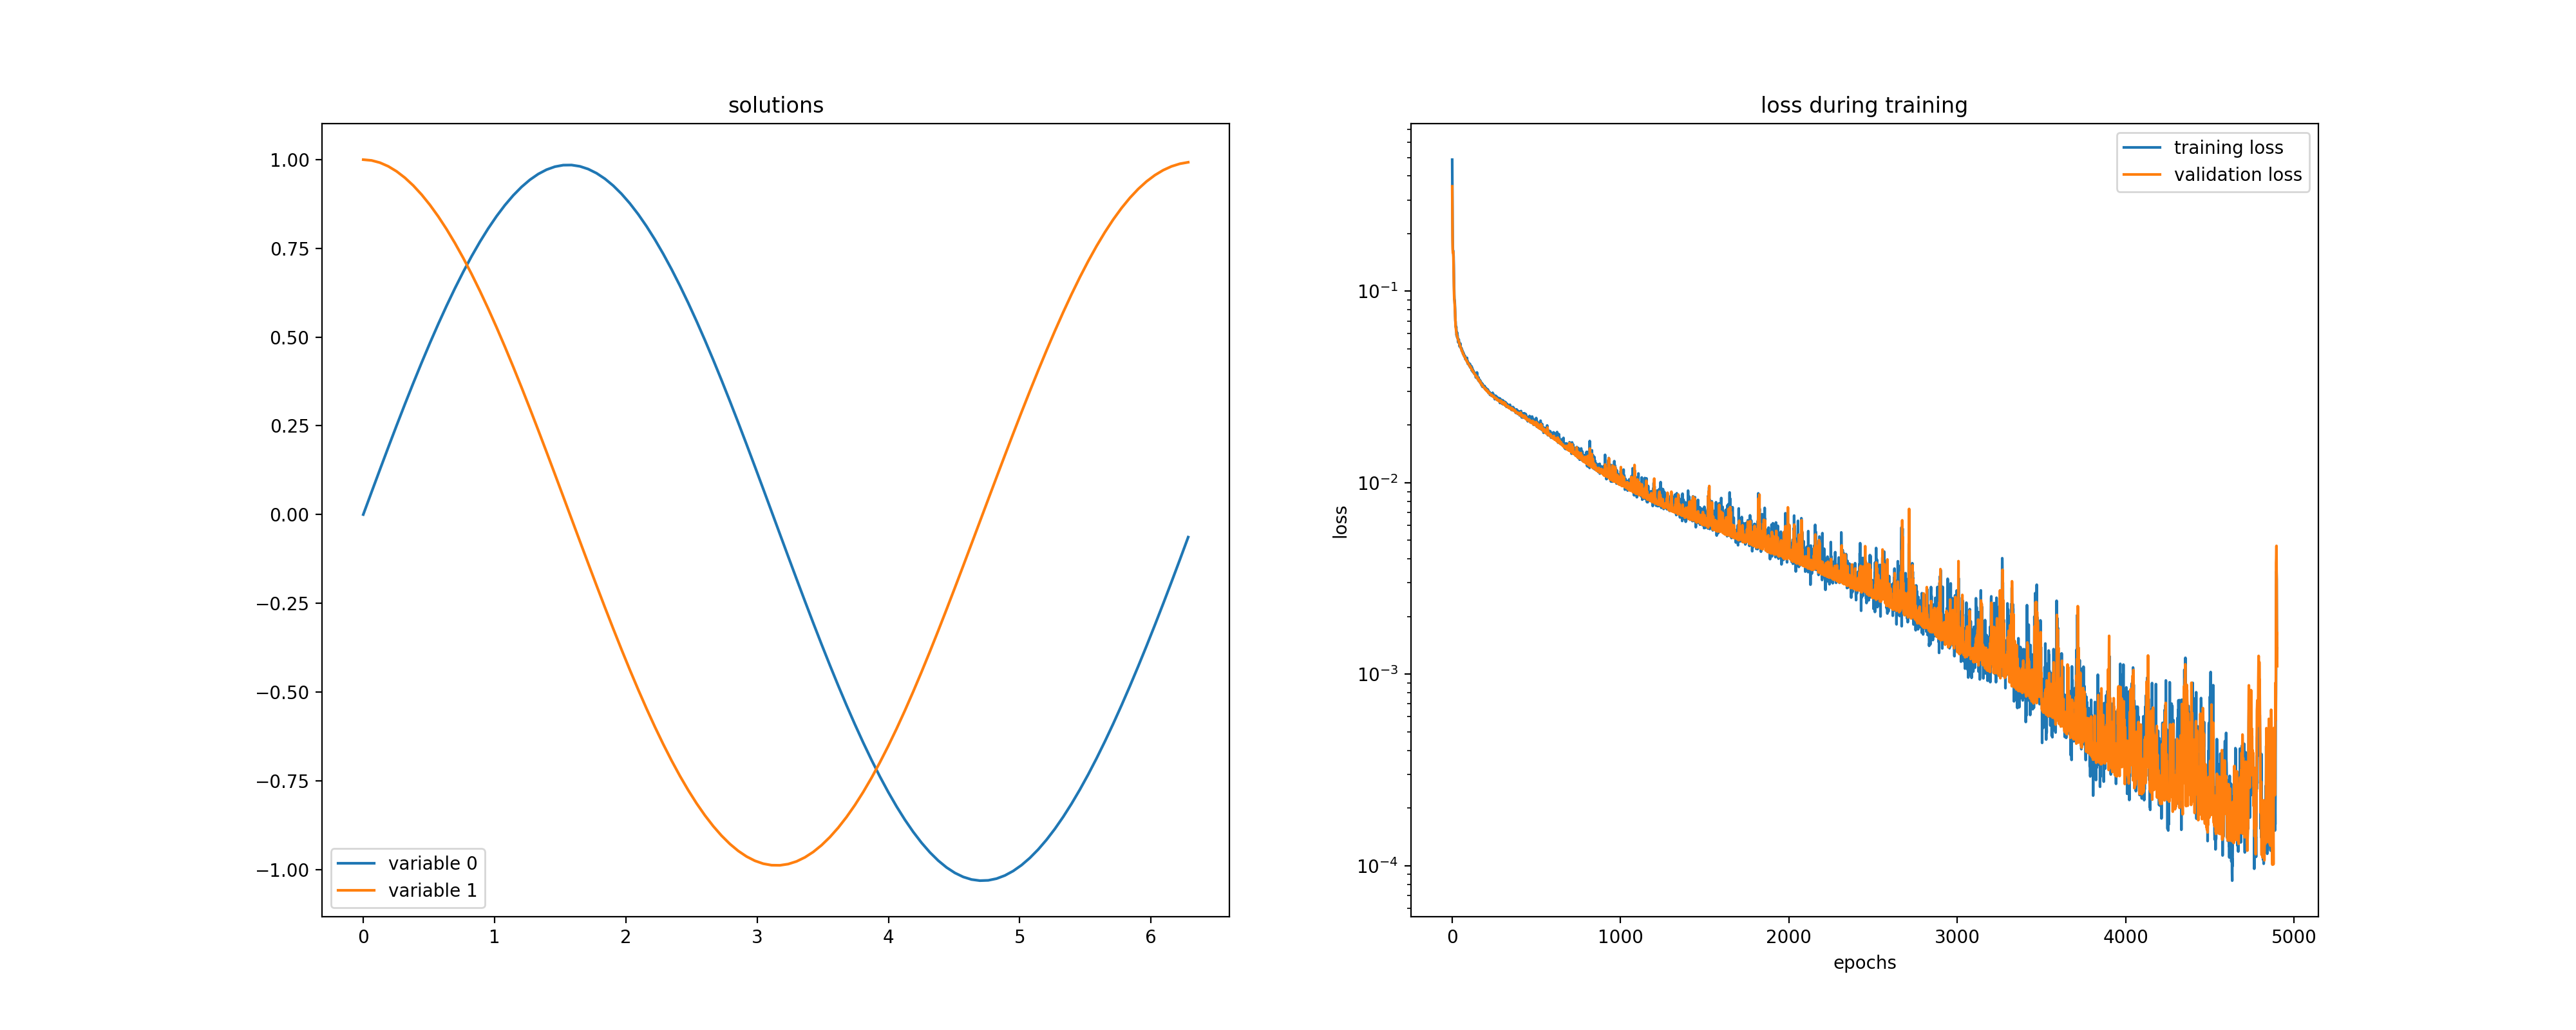

In [11]:
# specify the ODE system
parametric_circle = lambda x1, x2, t : [diff(x1, t) - x2, 
                                        diff(x2, t) + x1]
# specify the initial conditions
init_vals_pc = [
    IVP(t_0=0.0, x_0=0.0),
    IVP(t_0=0.0, x_0=1.0)
]

# solve the ODE system
solution_pc, _ = solve_system(ode_system=parametric_circle, 
                              conditions=init_vals_pc, 
                              t_min=0.0, t_max=2*np.pi, max_epochs=5000,
                              monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

`solve_system` returns a tuple, where the first entry is the solution as a function and the second entry is the loss history as a list. The solution is a function that maps $t$ to $[x_0, x_1, ..., x_{m-1}]$. It accepts `numpy.array` as input as well. Here we compare the ANN-based solution with the analytical solution:

<IPython.core.display.Javascript object>


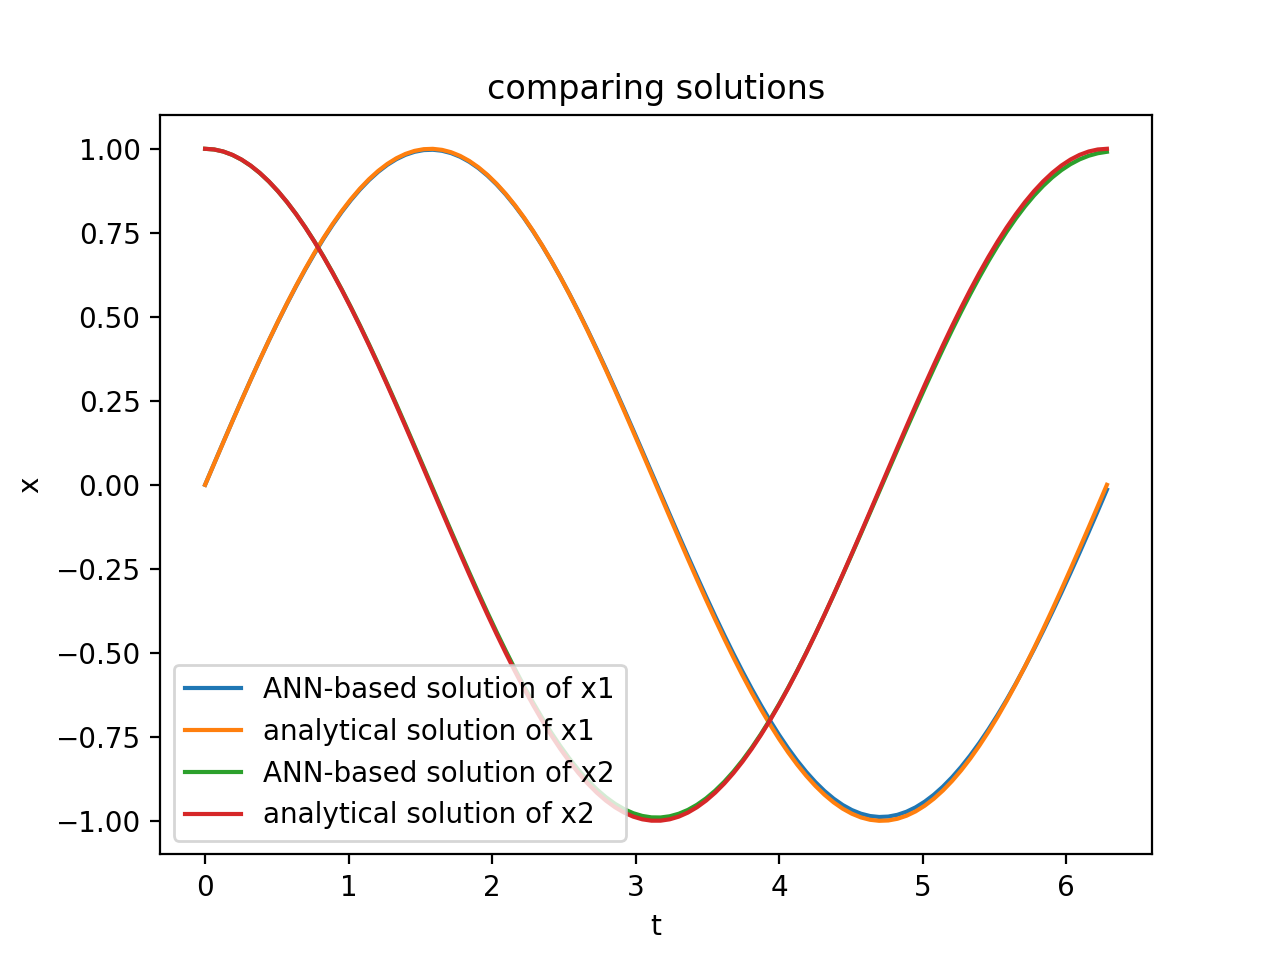

In [12]:
ts = np.linspace(0, 2*np.pi, 100)
x1_net, x2_net = solution_pc(ts, as_type='np')
x1_ana, x2_ana = np.sin(ts), np.cos(ts)

plt.figure()
plt.plot(ts, x1_net, label='ANN-based solution of x1')
plt.plot(ts, x1_ana, label='analytical solution of x1')
plt.plot(ts, x2_net, label='ANN-based solution of x2')
plt.plot(ts, x2_ana, label='analytical solution of x2')
plt.ylabel('x')
plt.xlabel('t')
plt.title('comparing solutions')
plt.legend()
plt.show()


### 2.2.1 Systems of ODE Example 2: Lotka–Volterra equations

Lotka–Volterra equations are a pair of nonlinear ODE frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and the other as prey:

$$\begin{align}
\frac{dx}{dt} = \alpha x - \beta xy \\
\frac{dy}{dt} = \delta xy - \gamma y
\end{align}$$

Let $\alpha = \beta = \delta = \gamma = 1$. Here we solve this pair of ODE when $x(0) = 1.5$ and $y(0) = 1.0$.

If not specified otherwise, `solve` and `solve_system` will use a fully-connected network with 1 hidden layer with 32 hidden units (tanh activation) to approximate each dependent variables. In some situations, we may want to use our own neural network. For example, the default neural net is not good at solving a problem where the solution oscillates. However, if we know in advance that the solution oscillates, we can use sin as activation function, which resulted in much faster convergence.

`neurodiffeq.FCNN` is a fully connected neural network. It is initiated by the following parameters:

* `n_hidden_units`: number of units for each hidden layer. Each hidden layer's number of units will be the same.

* `n_hidden_layers`: number of hidden layers

* `actv`: a `torch.nn.Module` *class*. e.g. `nn.Tanh`, `nn.Sigmoid`.

Here we will use another keyword for `solve_system`:

* `nets`: a list of networks to be used to approximate each dependent variable

In [13]:
from neurodiffeq.networks import FCNN    # fully-connect neural network
from neurodiffeq.networks import SinActv # sin activation

<IPython.core.display.Javascript object>


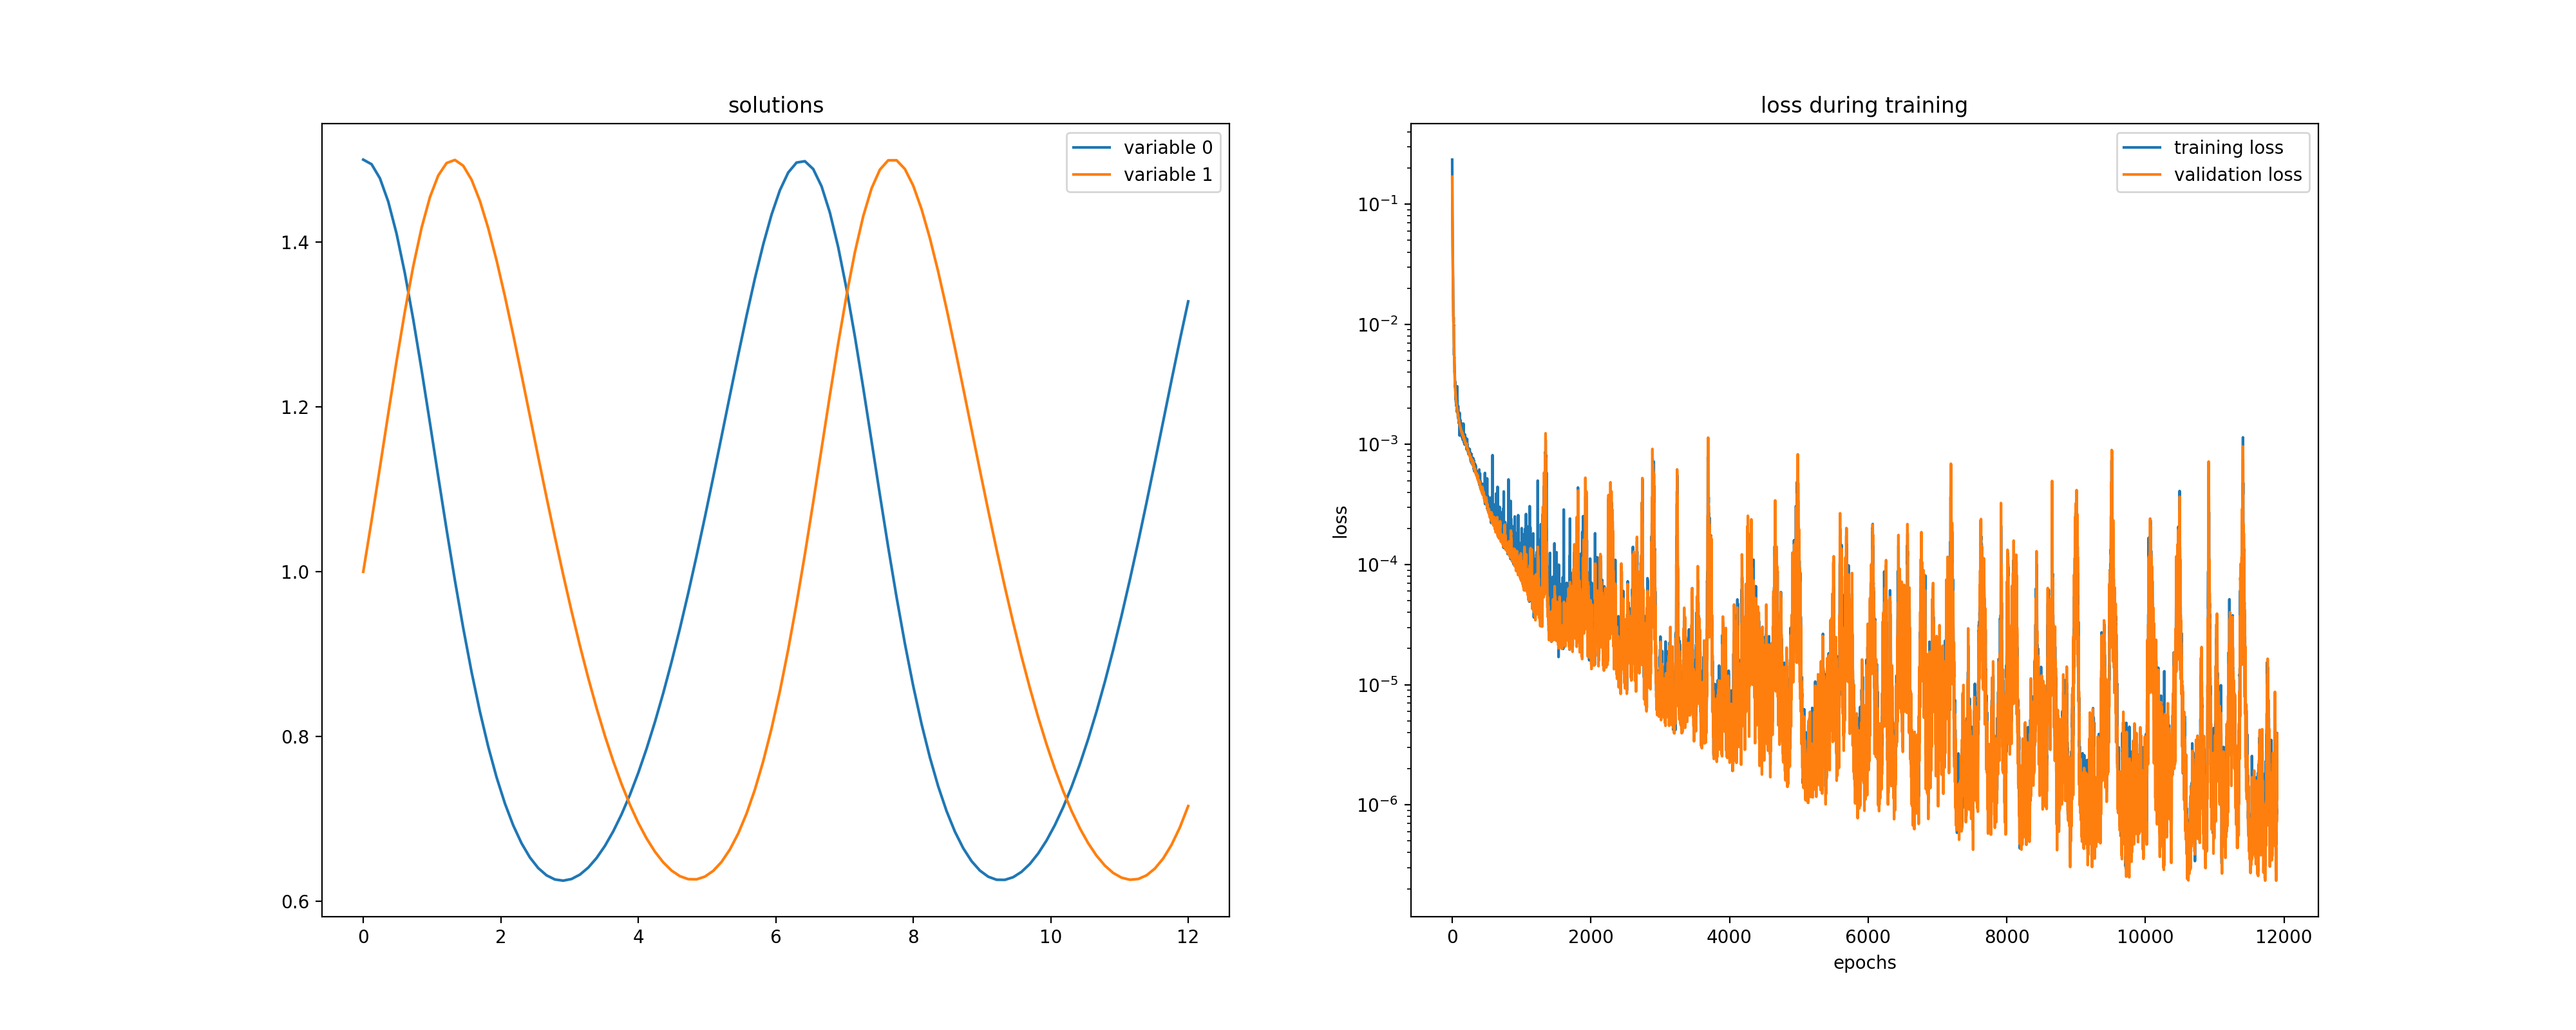

In [14]:
# specify the ODE system and its parameters
alpha, beta, delta, gamma = 1, 1, 1, 1
lotka_volterra = lambda x, y, t : [diff(x, t) - (alpha*x  - beta*x*y), 
                                   diff(y, t) - (delta*x*y - gamma*y)]
# specify the initial conditions
init_vals_lv = [
    IVP(t_0=0.0, x_0=1.5),
    IVP(t_0=0.0, x_0=1.0)
]

# specify the network to be used to approximate each dependent variable
nets_lv = [
    FCNN(n_hidden_units=32, n_hidden_layers=1, actv=SinActv),
    FCNN(n_hidden_units=32, n_hidden_layers=1, actv=SinActv)
]

# solve the ODE system
solution_lv, _ = solve_system(ode_system=lotka_volterra, conditions=init_vals_lv, 
                              t_min=0.0, t_max=12, nets=nets_lv, max_epochs=12000,
                              monitor=Monitor(t_min=0.0, t_max=12, check_every=100))

<IPython.core.display.Javascript object>


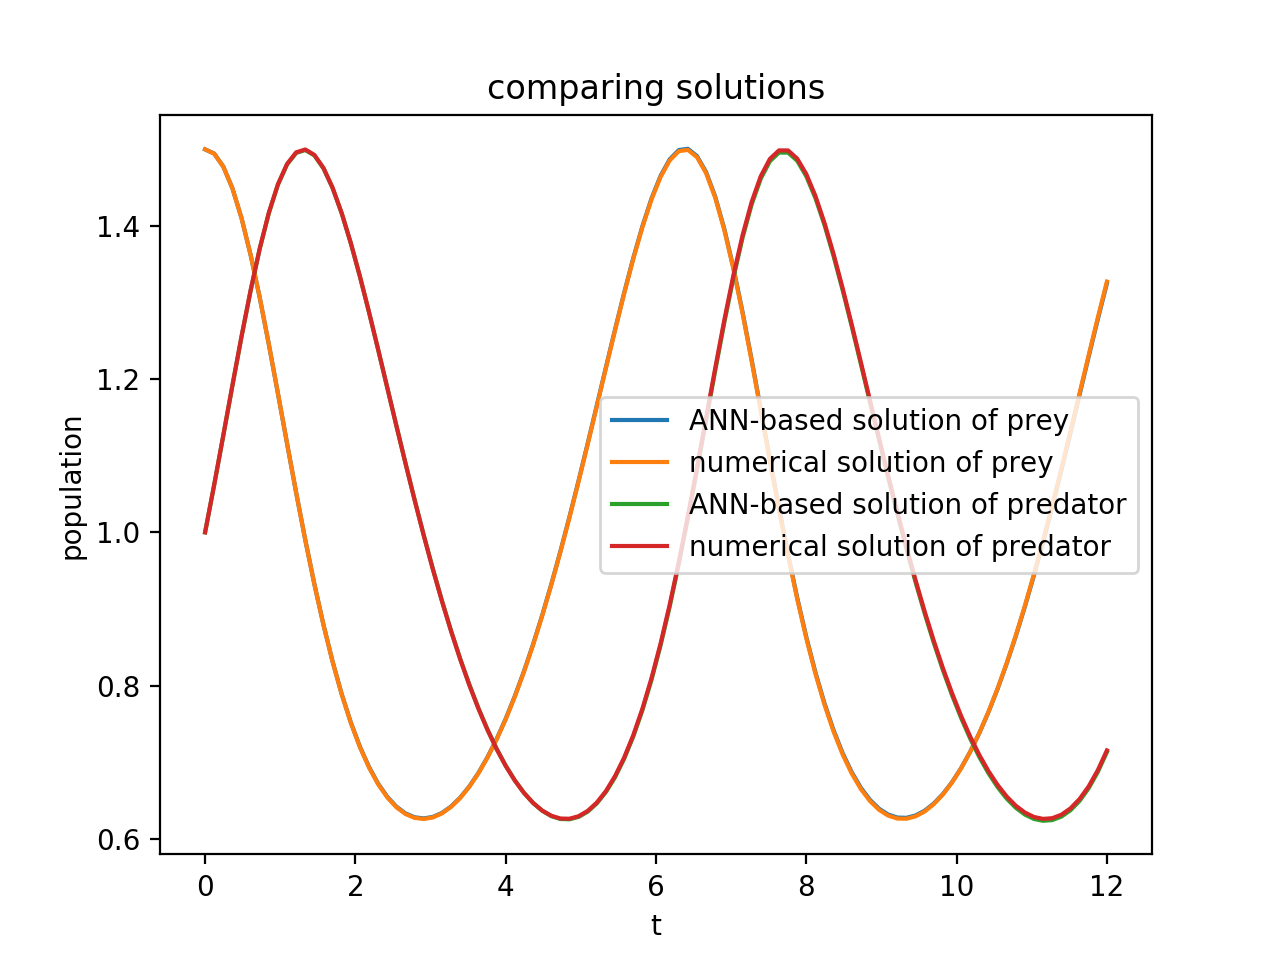

In [15]:
ts = np.linspace(0, 12, 100)

# ANN-based solution
prey_net, pred_net = solution_lv(ts, as_type='np')

# numerical solution
from scipy.integrate import odeint
def dPdt(P, t):
    return [P[0]*alpha - beta*P[0]*P[1], delta*P[0]*P[1] - gamma*P[1]]
P0 = [1.5, 1.0]
Ps = odeint(dPdt, P0, ts)
prey_num = Ps[:,0]
pred_num = Ps[:,1]

plt.figure()
plt.plot(ts, prey_net, label='ANN-based solution of prey')
plt.plot(ts, prey_num, label='numerical solution of prey')
plt.plot(ts, pred_net, label='ANN-based solution of predator')
plt.plot(ts, pred_num, label='numerical solution of predator')
plt.ylabel('population')
plt.xlabel('t')
plt.title('comparing solutions')
plt.legend()
plt.show()

---

# 3. Tuning the Solver

The `solve` and `solve` system choose some hyperparameters by default. For example, in `solve`, by default:
* the solution is approximated by a fully connected network with 1 hidden layer with 32 units (tanh activation),
* for each epoch we train on 32 different points that are generated by adding a Gaussian noise on the 32 equally spaced points on the $t$ domain,
* an Adam optimizer with learning rate 0.001 is used
Sometimes we may want to choose these hyperparameters ourselves. We will be using the harmonic oscillator problem from above to demonstrate how to do that.

## 3.1. Specifying the Networks

In [16]:
from neurodiffeq.networks import FCNN # fully-connect neural network
from torch import nn                  # PyTorch neural network module

We can pass a `torch.nn.Module` object as the `net` argument to `solve`. This specifies the network architecture we will use to approximate $x$. `neurodiffeq.networks.FCNN` is a fully connected network that has the same hidden units for each hidden layer. It can be initiated with the following arguments:

* `n_hidden_units`: number of units for each hidden layer. Each hidden layer's number of units will be the same.

* `n_hidden_layers`: number of hidden layers

* `actv`: a `torch.nn.Module` *class*. e.g. `nn.Tanh`, `nn.Sigmoid`.

Here we create a fully connected network with 2 hidden layers, each with 16 units and tanh activation. We then use it to fit our ODE solution.

<IPython.core.display.Javascript object>


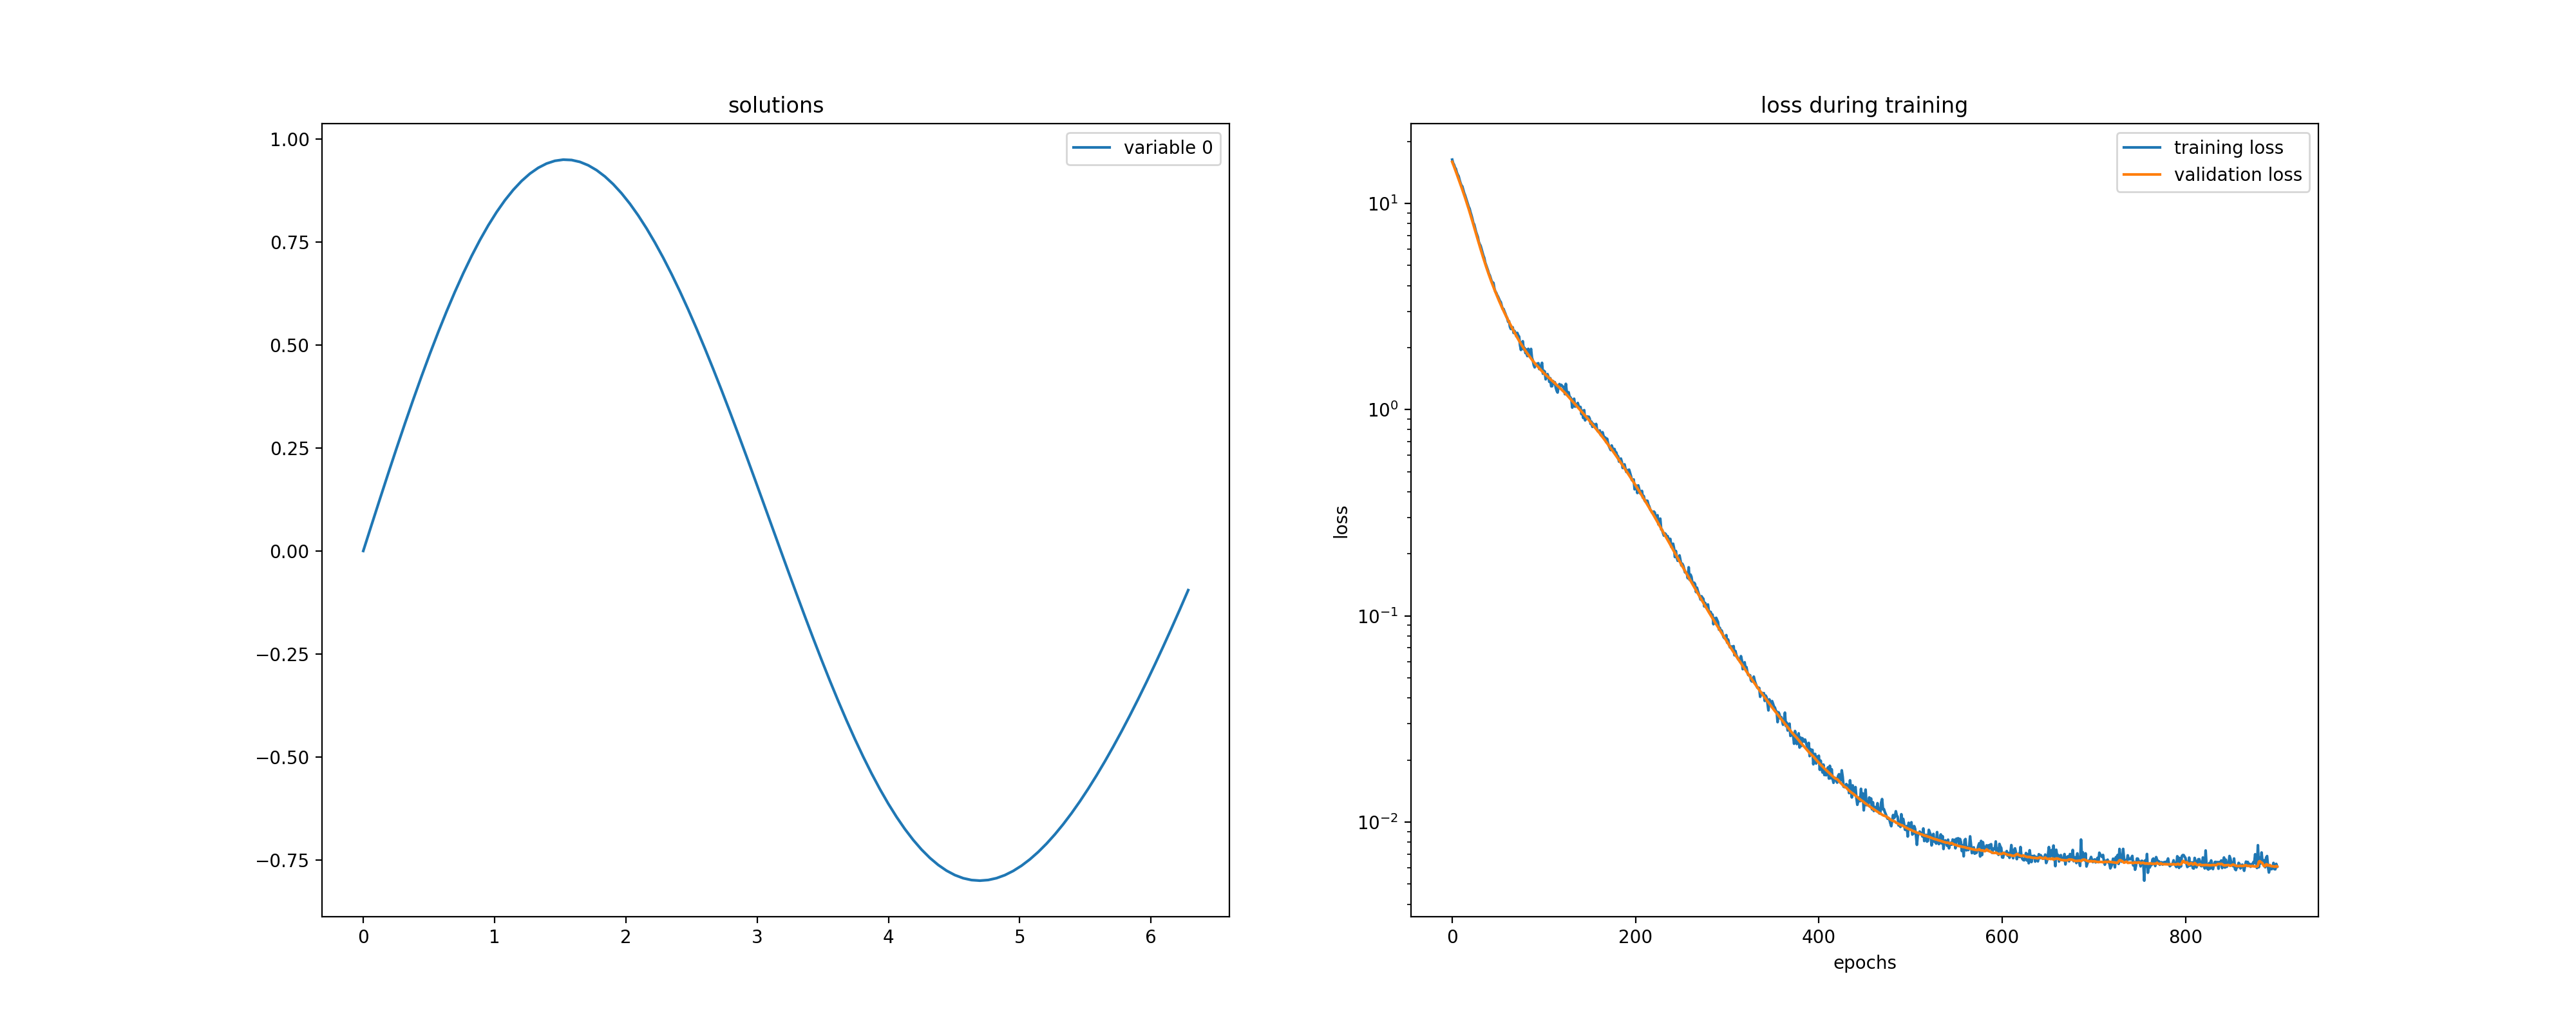

In [17]:
# specify the network architecture
net_ho = FCNN(n_hidden_layers=2,
              n_hidden_units=16,
              actv=nn.Tanh)

# solve the ODE
solution_ho, _ = solve(ode=harmonic_oscillator, condition=init_val_ho, 
                       t_min=0.0, t_max=2*np.pi,
                       net=net_ho,
                       monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

Similarly, we can pass a list of `torch.nn.Module` objects as the `nets` argument to `solve_system`. This specifies the network architecture we will use to approximate each $x_{i}$. The first network in the list will be used to approximate $x_0$ and the second network in the list will be used to approximate $x_1$ and so on.

Here we create 2 fully connected networks with the same architecture (2 hidden layers, each with 16 units and tanh activation). We then use them to fit our ODE system solution.

<IPython.core.display.Javascript object>


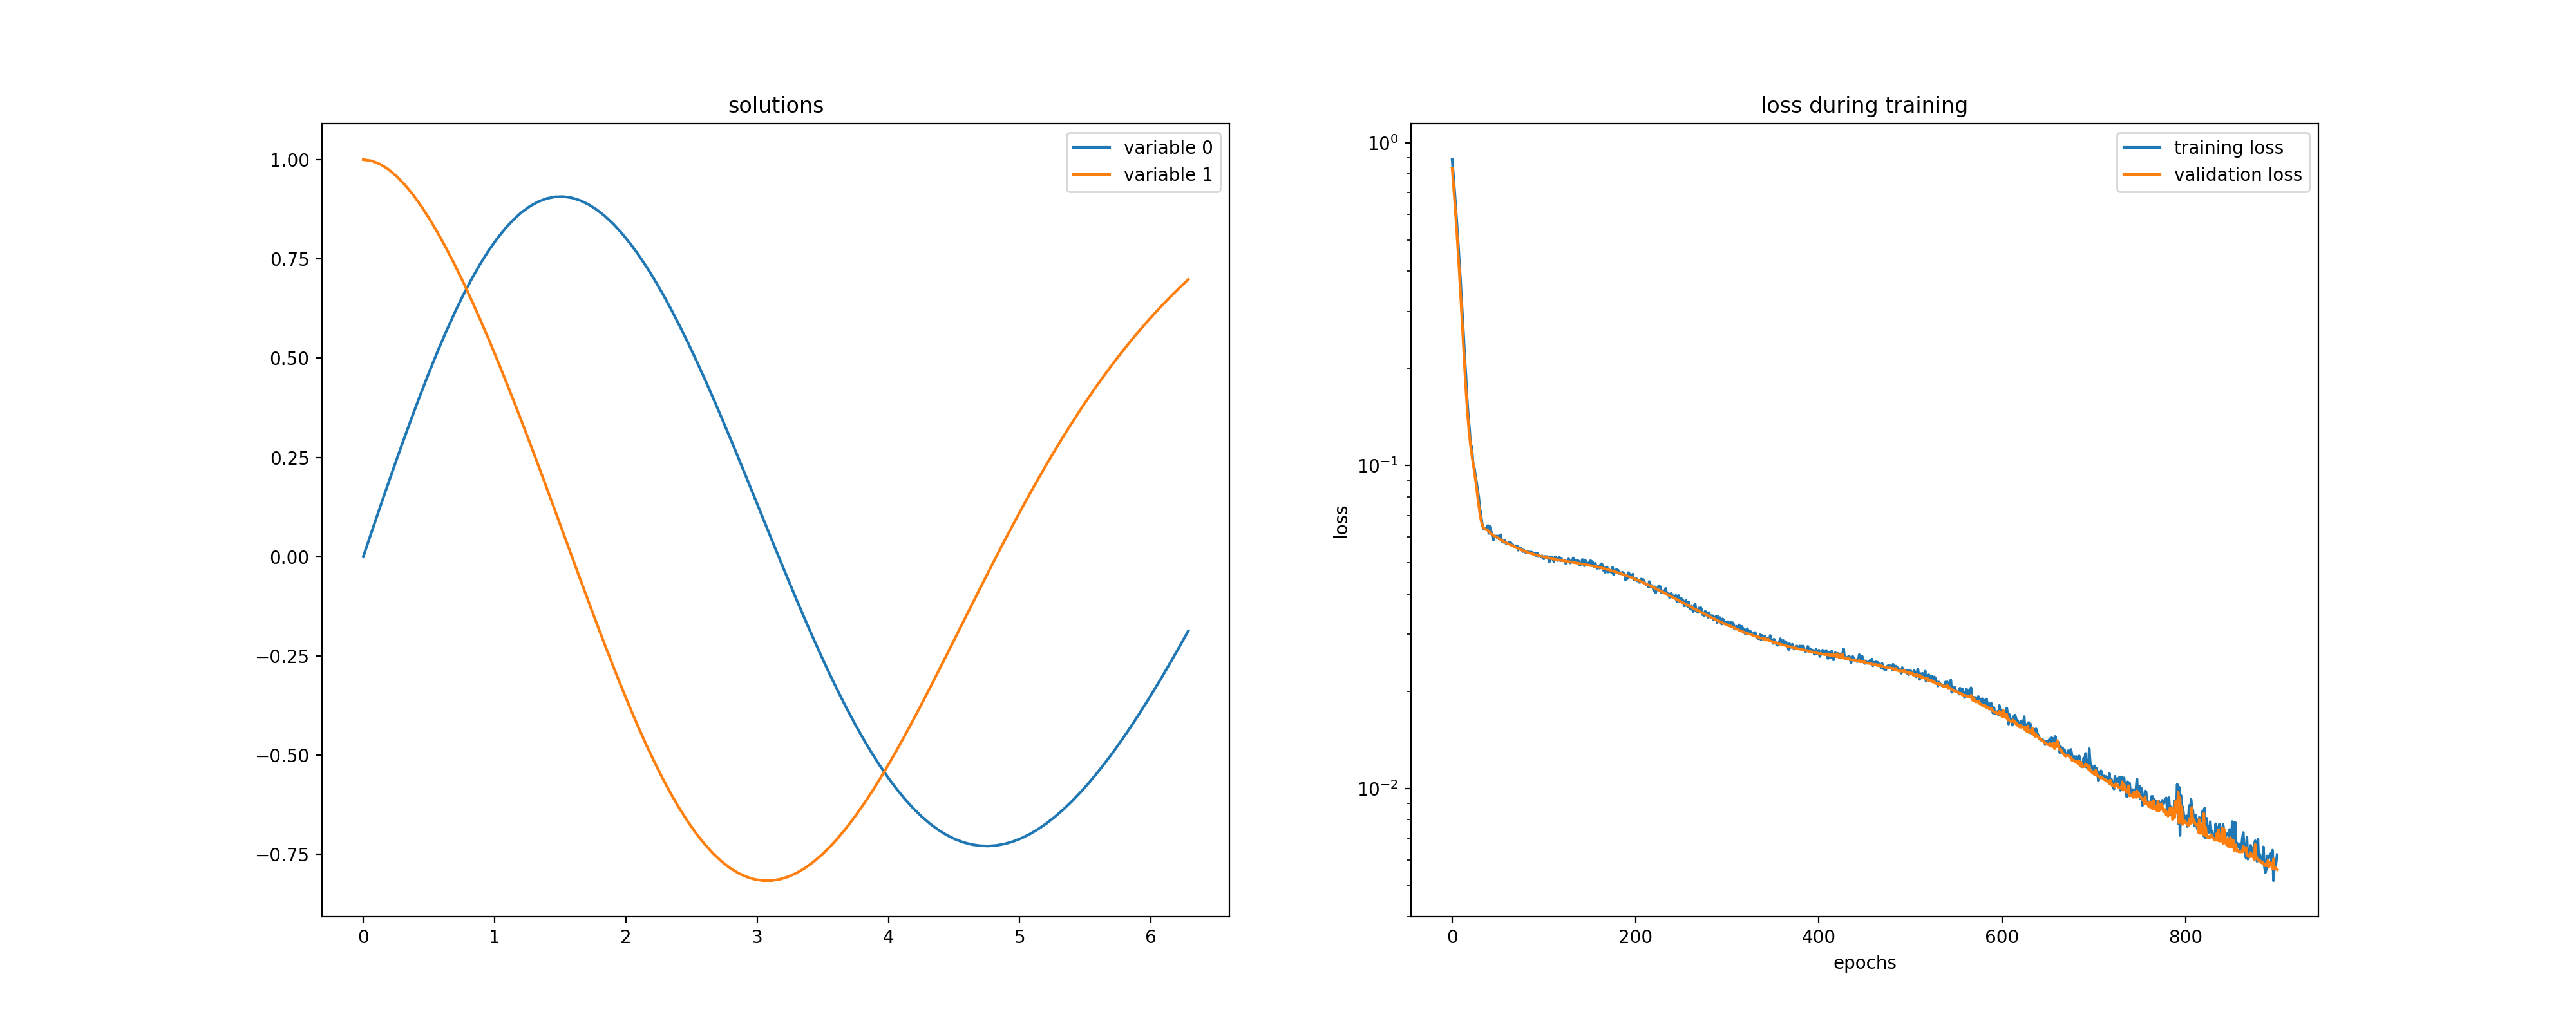

In [18]:
# specify the network architecture
nets_ho = [
    FCNN(n_hidden_layers=2, n_hidden_units=16, actv=nn.Tanh),
    FCNN(n_hidden_layers=2, n_hidden_units=16, actv=nn.Tanh)
]

# solve the ODE system
solution_pc, _ = solve_system(ode_system=parametric_circle, 
                              conditions=init_vals_pc, 
                              t_min=0.0, t_max=2*np.pi,
                              nets=nets_ho,
                              monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

## 3.2. Specifying the Training Set and Validation Set

`solve` and `solve_system` will train the neural network on a new set of examples. These examples are $t$s drawn from the domain of $t$. The way these $t$s are generated can be specified by passing a `neurodiffeq.ode.ExampleGenerator` object as the `train_generator` argument (and `valid_generator` argument) to `solve` or `solve_system`. An `ExampleGenerator` can be initiated by the following arguments:

* `size`: the number of $t$s generated for each epoch

* `t_min` and `t_max`: the domain of $t$ from which we want to draw $t$s

* `method`: a string indicating how to generate the $ts$. It should be one of the following: 'uniform', 'equally-spaced', 'equally-spaced-noisy'. If 'uniform', each $t$ will be drawn independently from the uniform distribution $\text{Unif}($`t_min`, `t_max`$)$. If 'equally-spaced', all $t$s generated in the same epoch will form a grid where each $t$ is equally spaced. 'equally-spaced-noisy' is a noisy version of 'equally-spaced' where we add a Gaussian noise $\epsilon \sim \mathcal{N}(0, ($`t_max`-`t_min`)/(4*`size`) $)$

Here we create an `ExampleGenerator` that generates 64 $t$s drawn from a uniform distribution for every epoch. Then we use it to solve the ODE. In the meantime, foor every epoch, we will use another `ExampleGenerator` that generates 128 $t$s that are equally spaced in the domain we want to solve.

In [19]:
from neurodiffeq.ode import ExampleGenerator

<IPython.core.display.Javascript object>


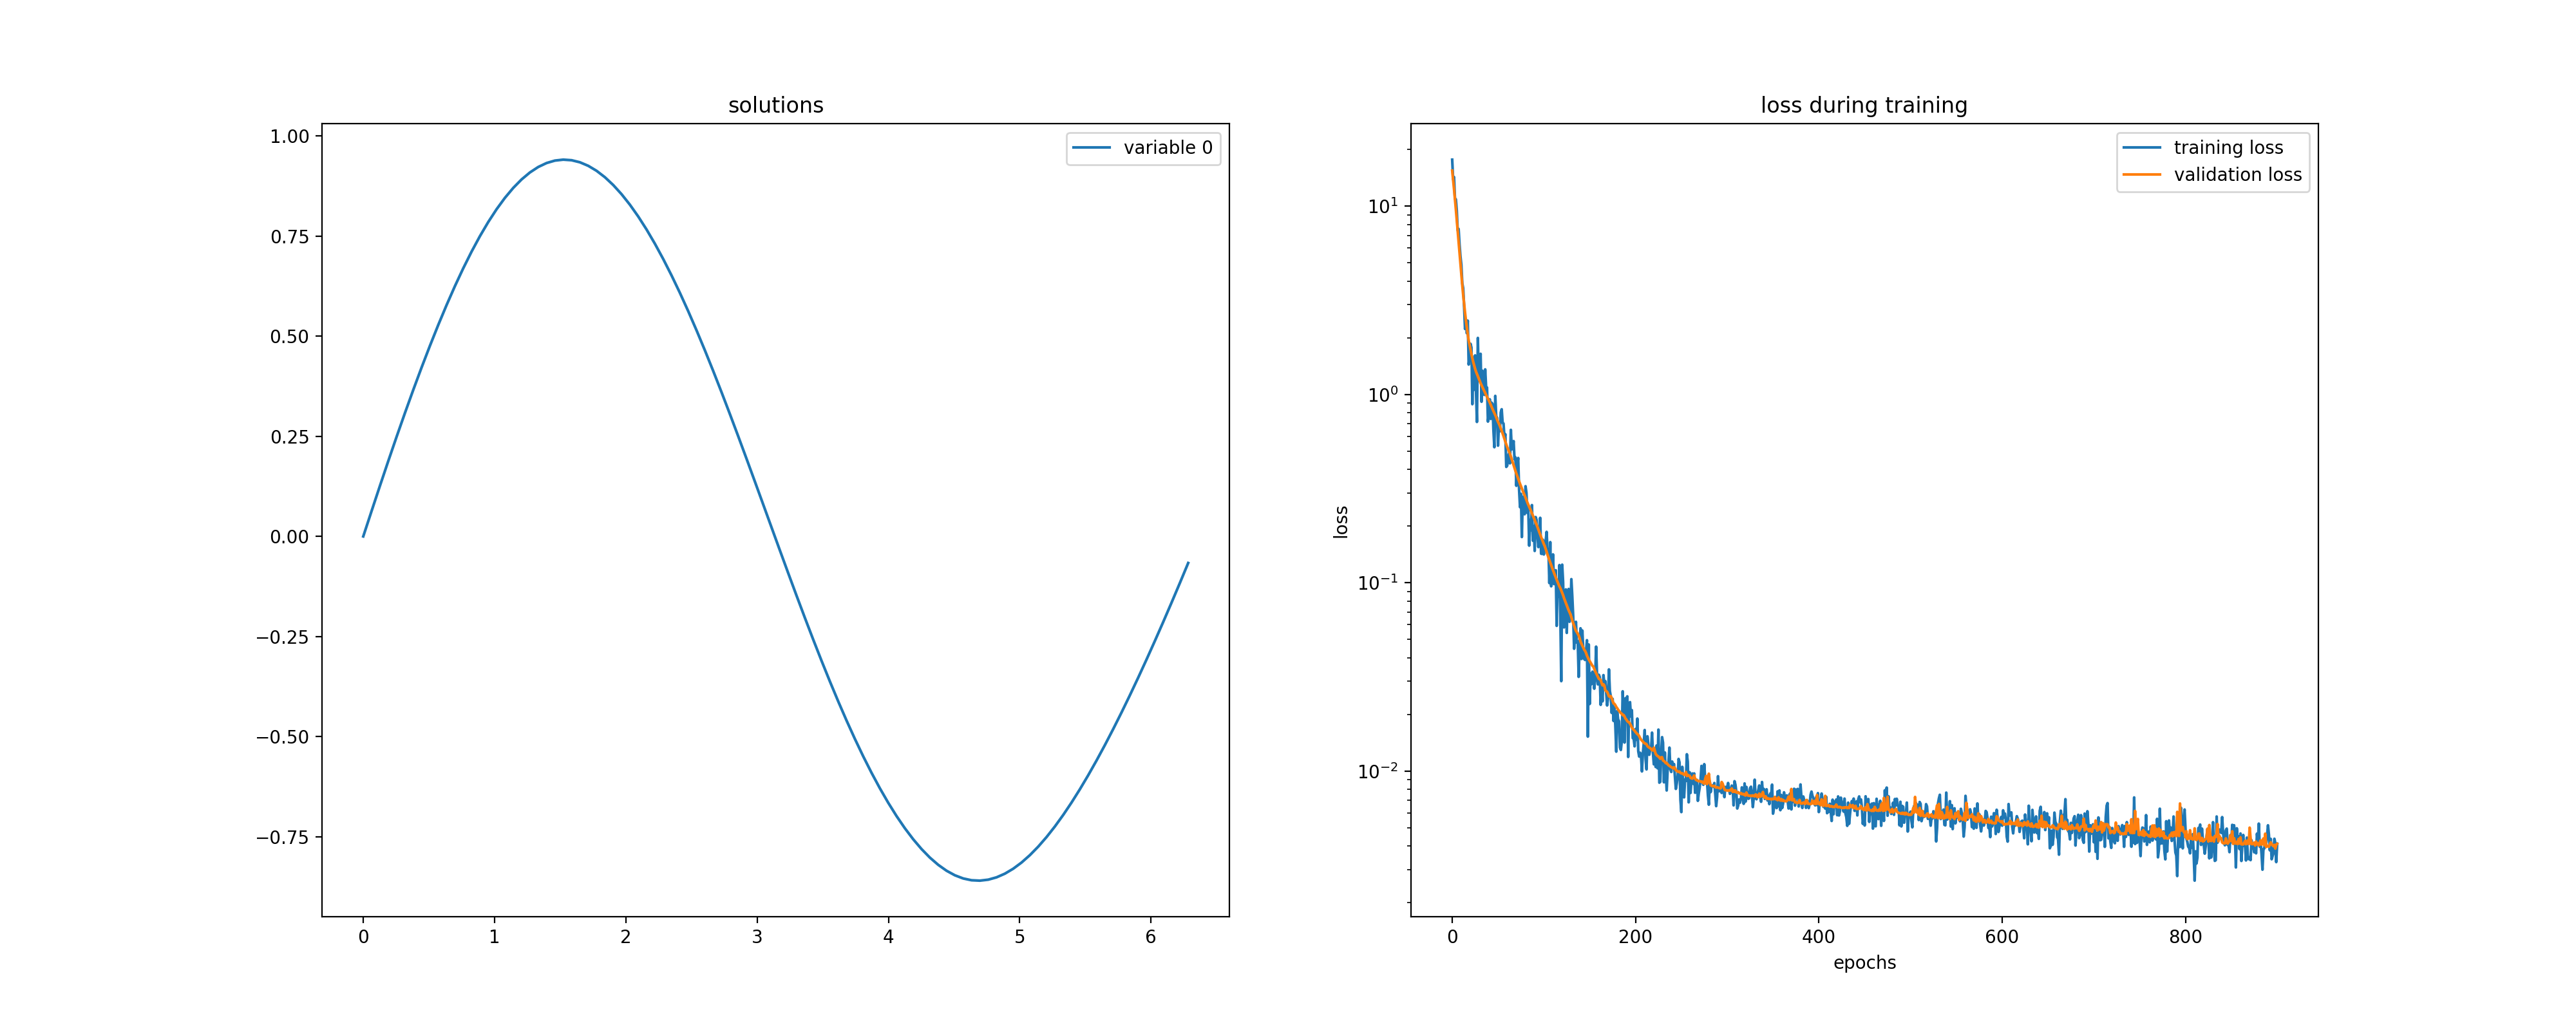

In [20]:
# specify the training set and validation set
train_gen = ExampleGenerator(size=64,  t_min=0.0, t_max=2*np.pi, method='uniform')
valid_gen = ExampleGenerator(size=128, t_min=0.0, t_max=2*np.pi, method='equally-spaced')

# solve the ODE
solution_ho, _ = solve(ode=harmonic_oscillator, condition=init_val_ho, 
                       t_min=0.0, t_max=2*np.pi,
                       train_generator=train_gen,
                       valid_generator=valid_gen,
                       monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

It is the same with an ODE system:

<IPython.core.display.Javascript object>


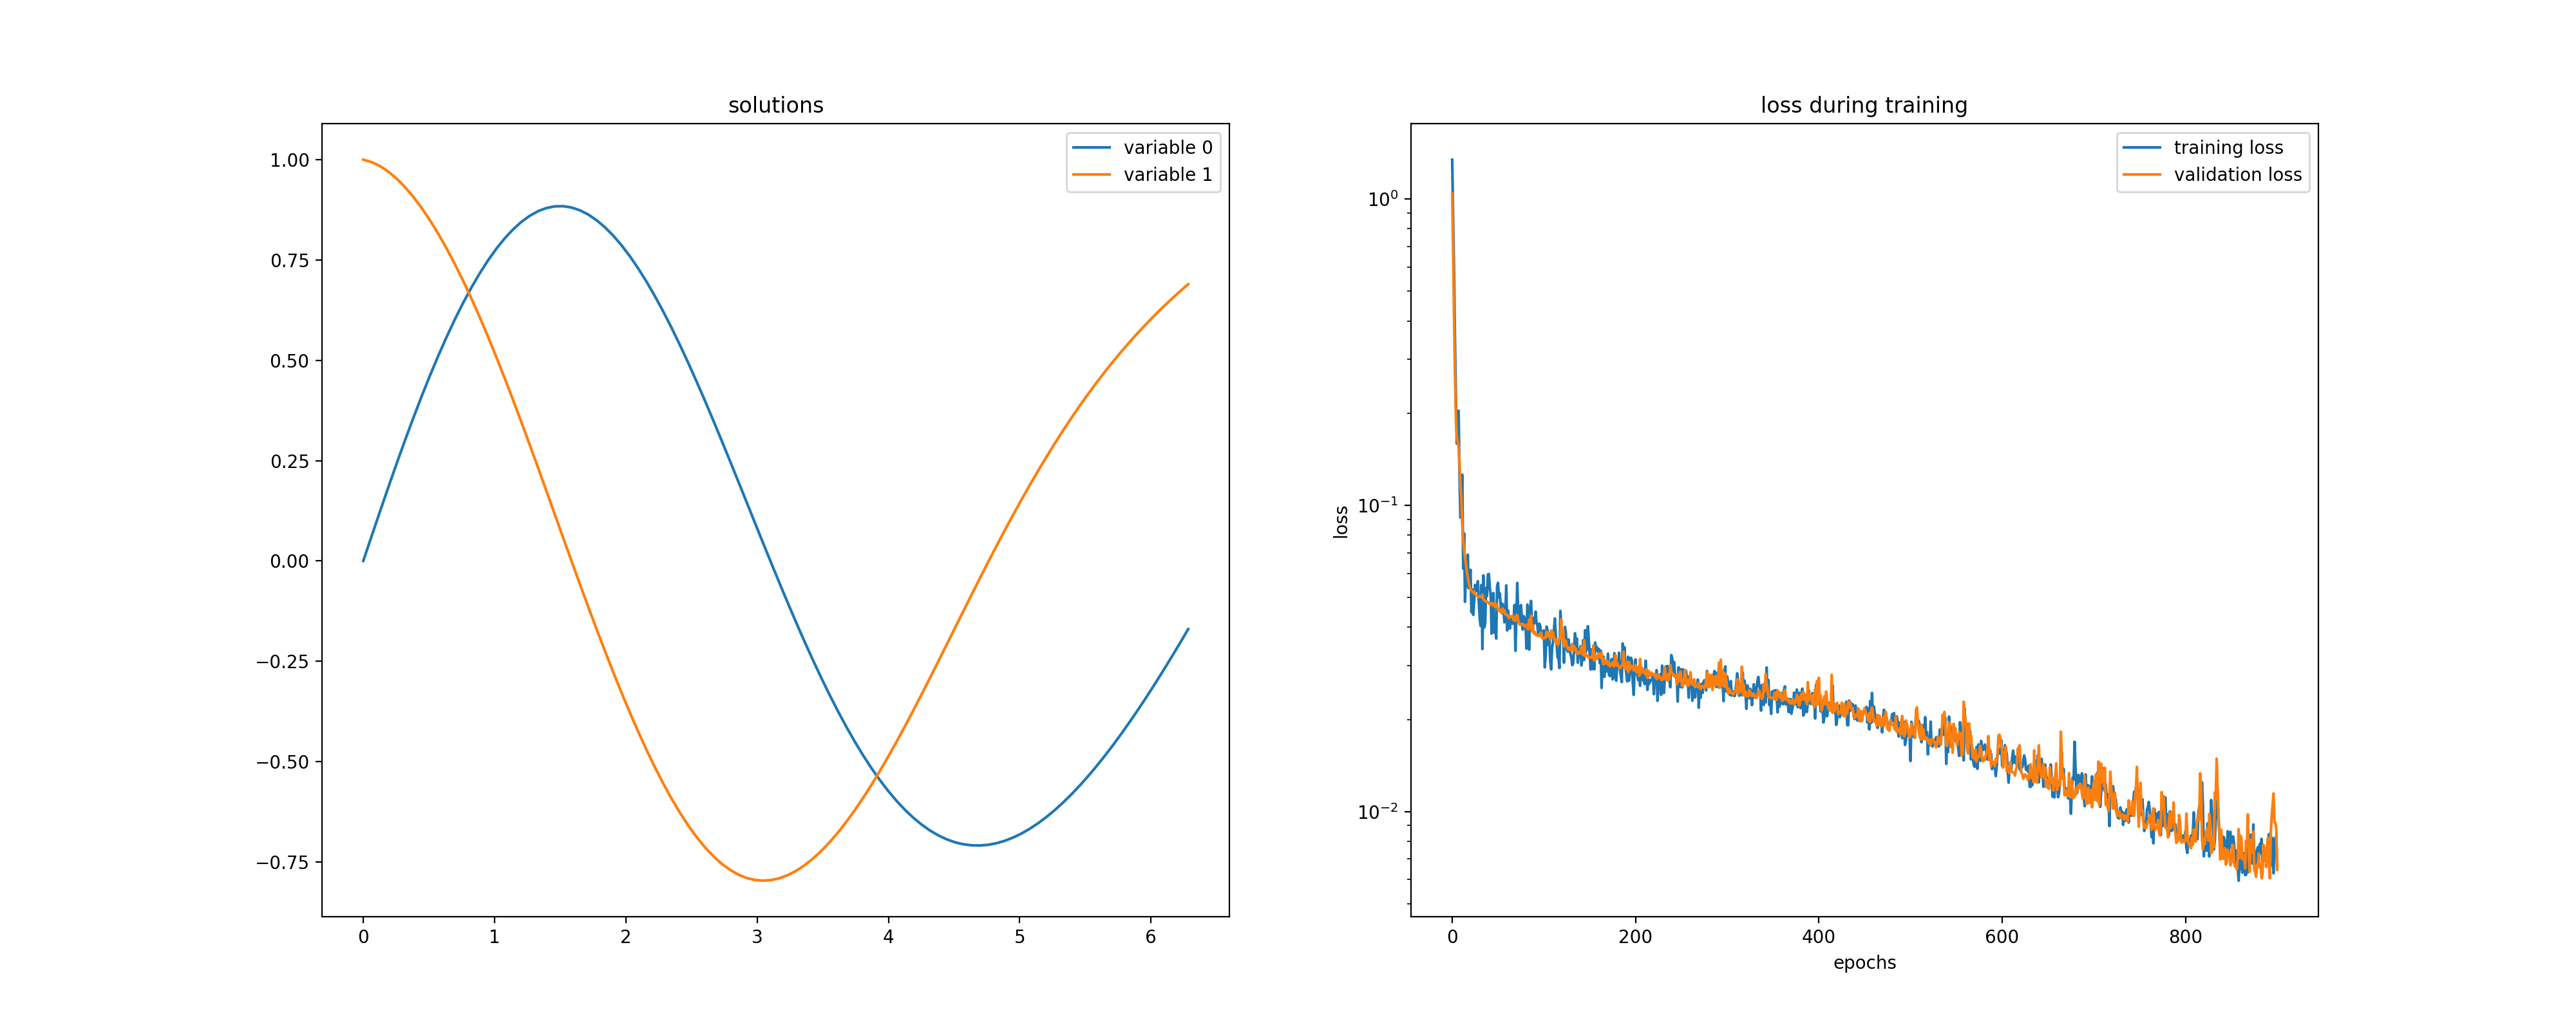

In [21]:
# specify the training set and validation set
train_gen = ExampleGenerator(size=64,  t_min=0.0, t_max=2*np.pi, method='uniform')
valid_gen = ExampleGenerator(size=128, t_min=0.0, t_max=2*np.pi, method='equally-spaced')

# solve the ODE system
solution_pc, _ = solve_system(ode_system=parametric_circle, 
                              conditions=init_vals_pc, 
                              t_min=0.0, t_max=2*np.pi,
                              train_generator=train_gen,
                              valid_generator=valid_gen,
                              monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

## 3.3. Specifying the Optimizer

We can change the optimization algorithms by passing a `torch.optim.Optimizer` object to `solve` and `solve_system` as the `optimizer` argument. The ugly thing here is that, to initiate an `Optimizer`, we need to tell it the parameters to optimize. In other words, if we want to use a different optimizer from the default one, we also need to create our own networks. 

Here we create a fully connected network and an `SGD` optimizer to optimize its weights. Then we use them to solve the ODE.

In [22]:
from torch.optim import SGD

<IPython.core.display.Javascript object>


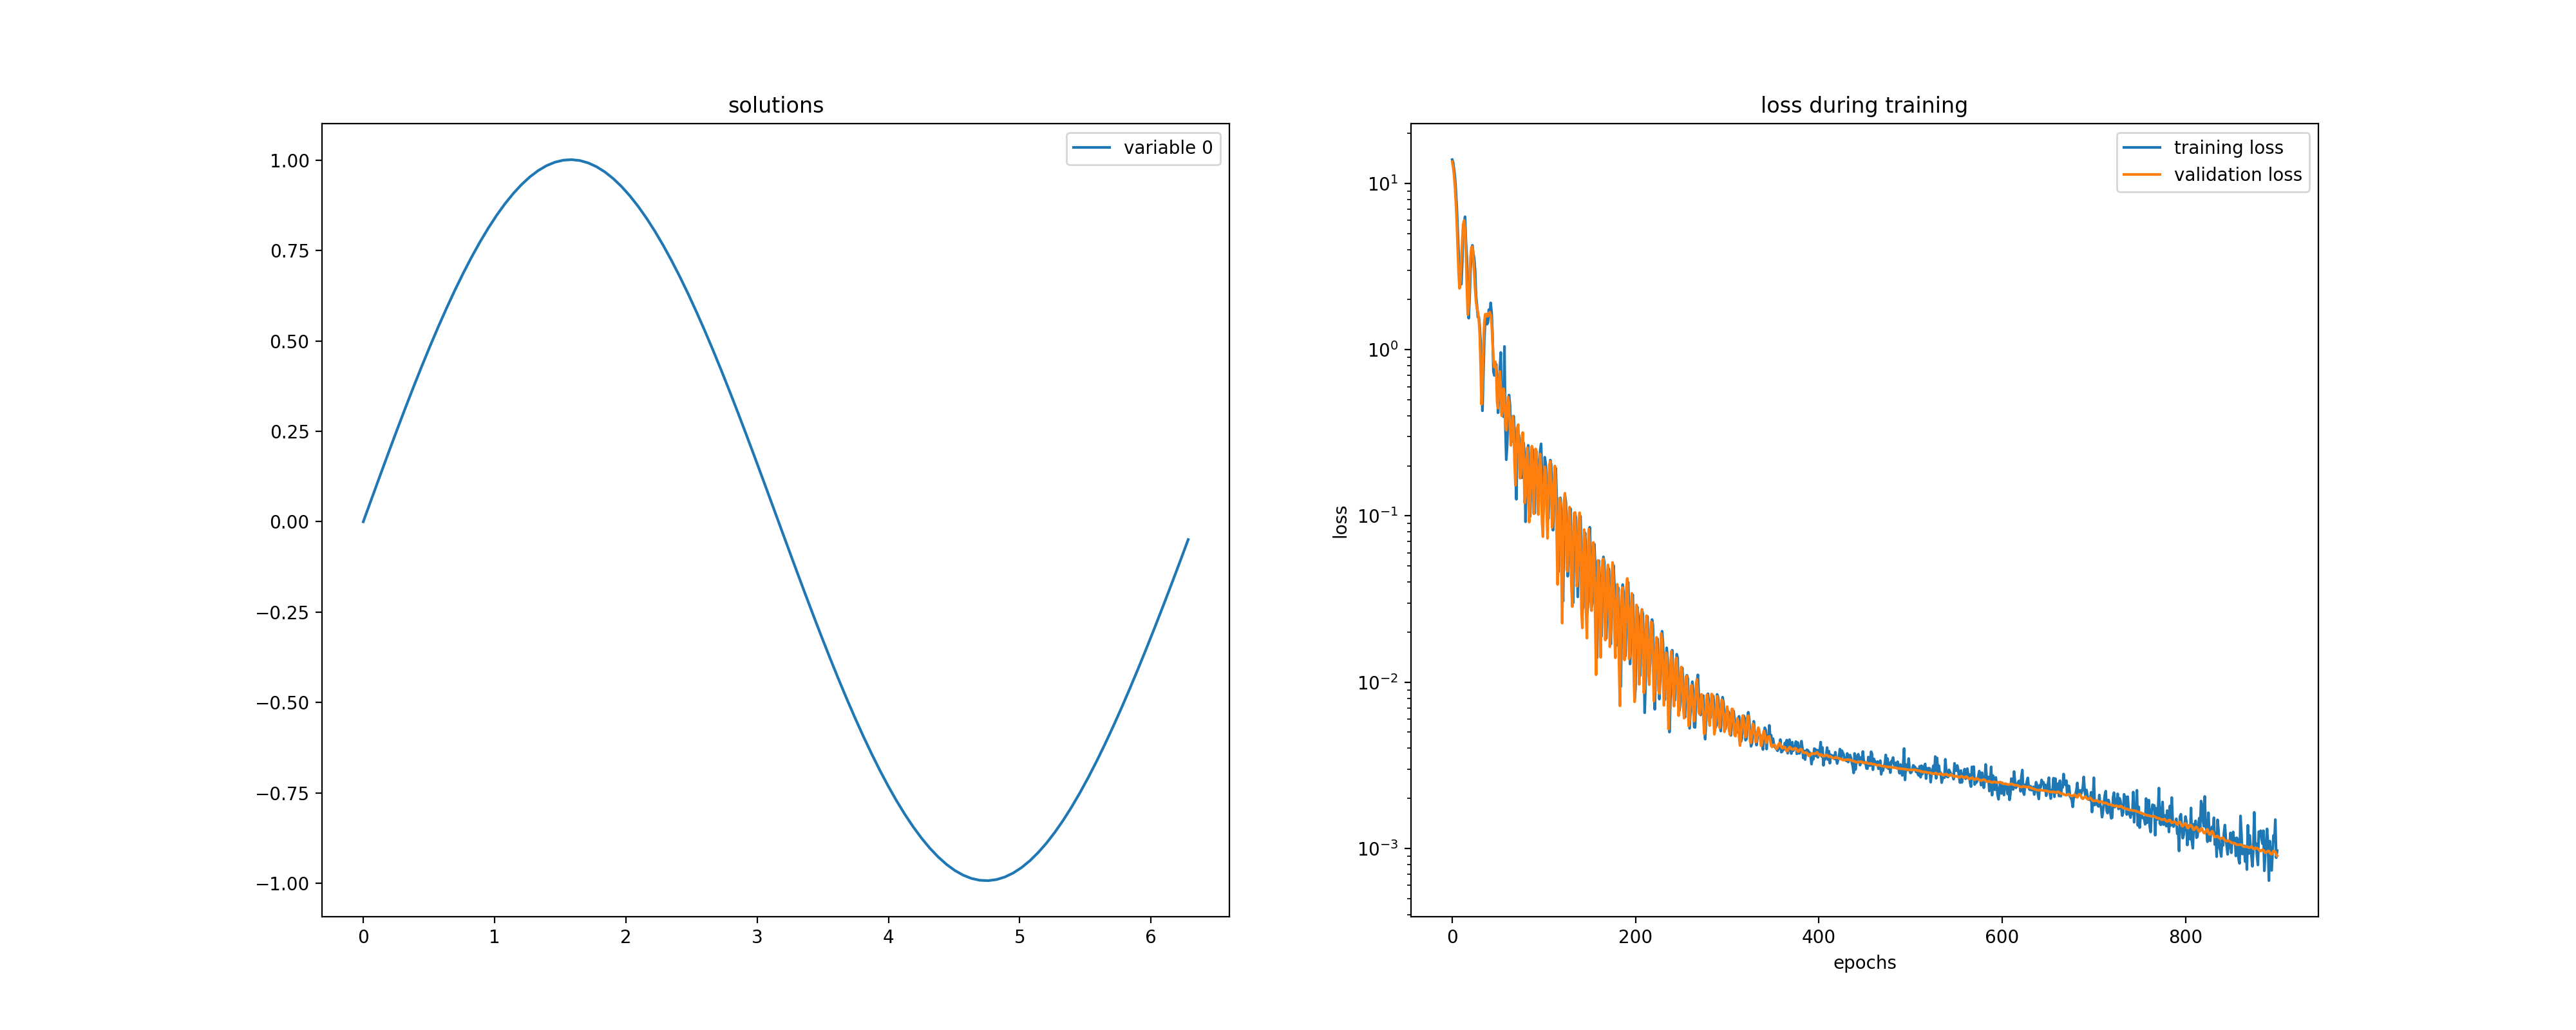

In [23]:
# specify the network architecture
net_ho = FCNN(n_hidden_layers=2,
              n_hidden_units=16,
              actv=nn.Tanh)

# specify the optimizer
sgd_ho = SGD(net_ho.parameters(), lr=0.001, momentum=0.99)

# solve the ODE
solution_ho, _ = solve(ode=harmonic_oscillator, condition=init_val_ho, 
                       t_min=0.0, t_max=2*np.pi,
                       net=net_ho,
                       optimizer=sgd_ho,
                       monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

It is the same with an ODE system:

<IPython.core.display.Javascript object>


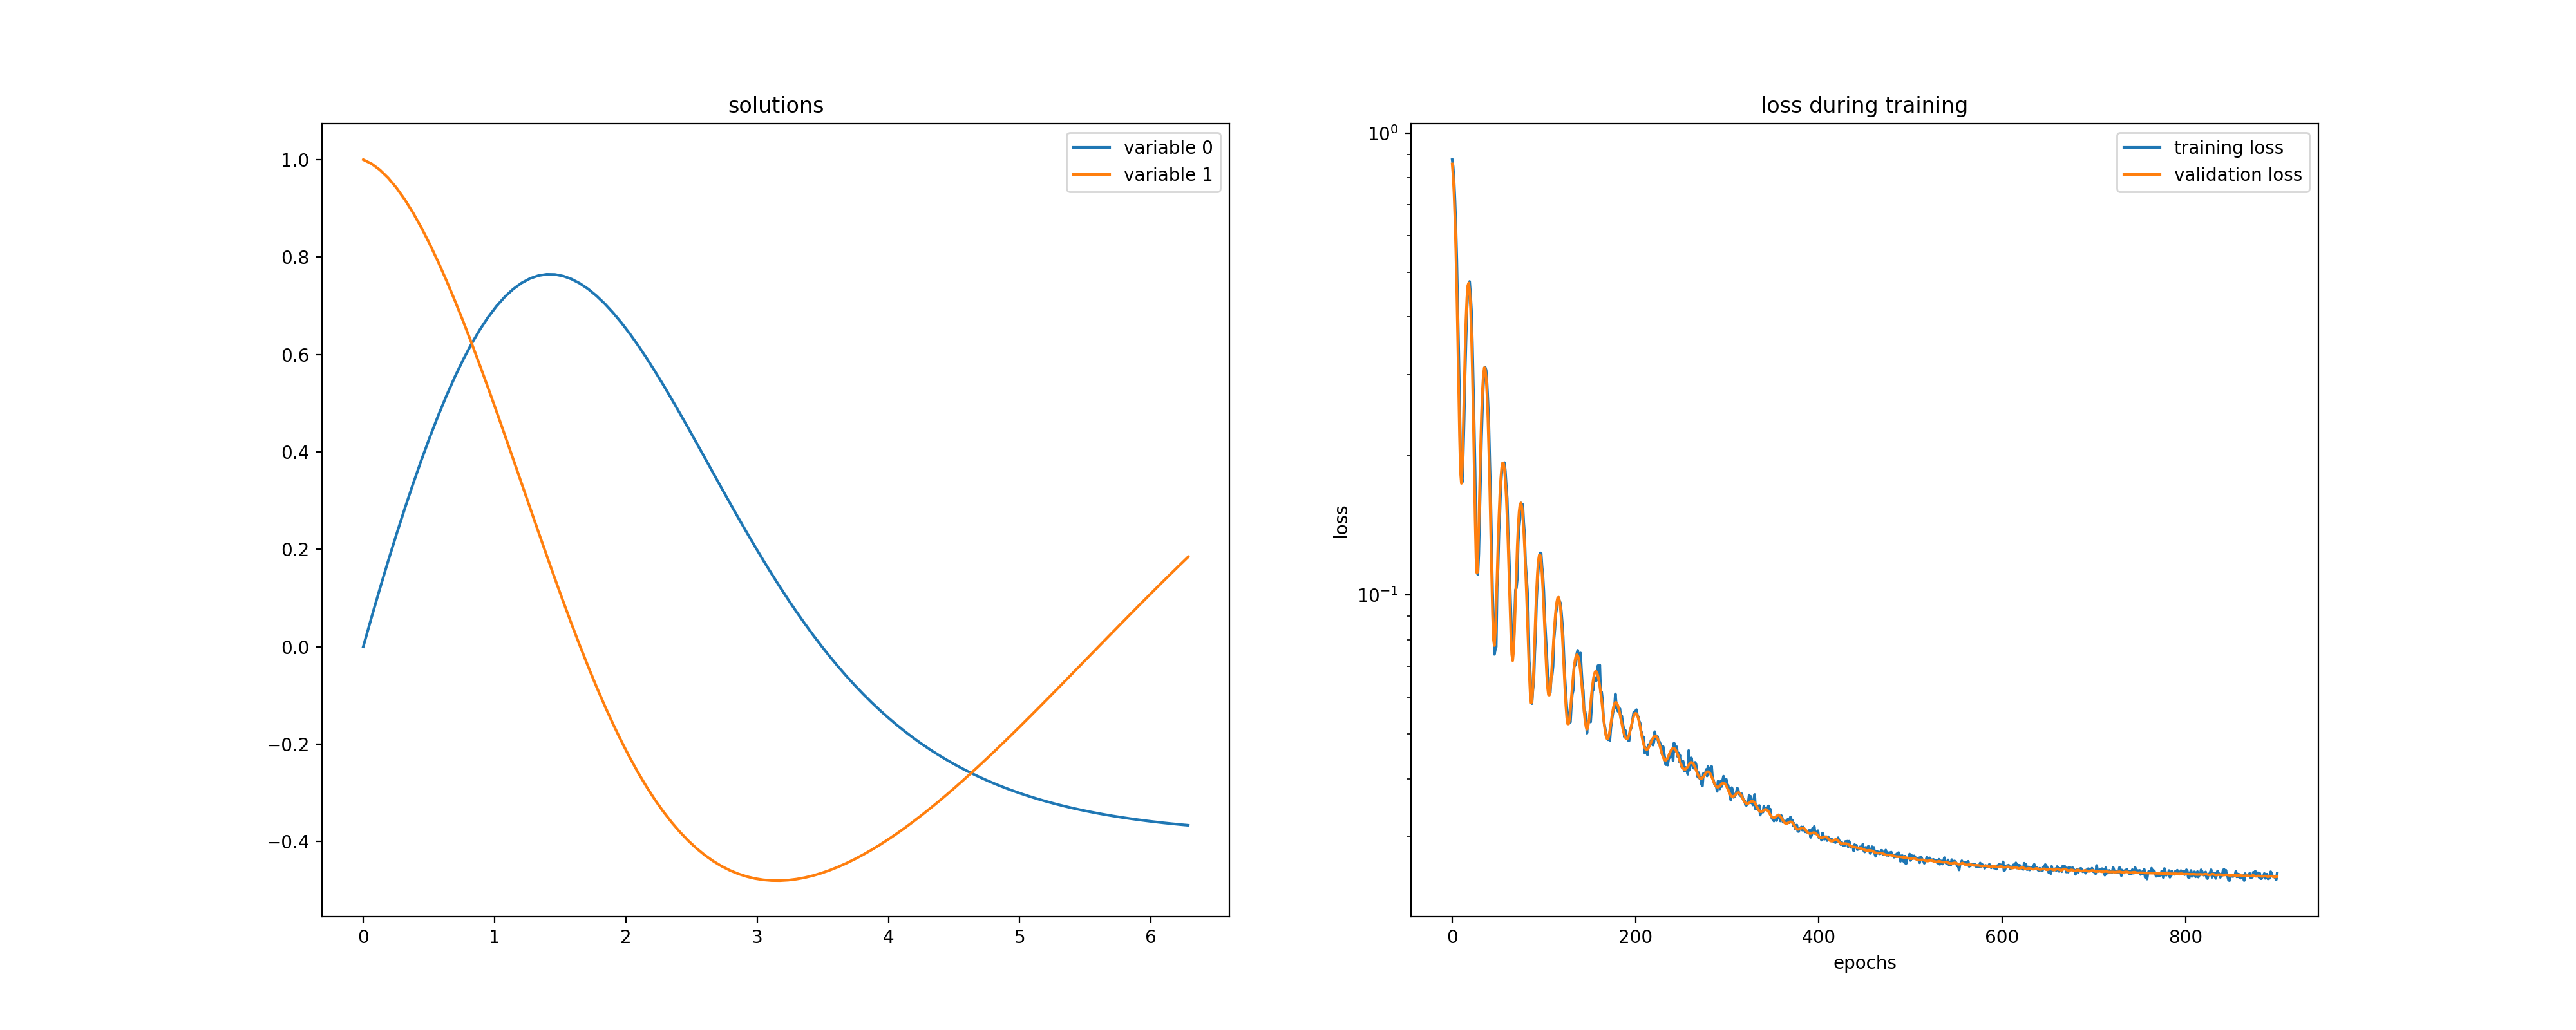

In [24]:
# specify the network architecture
nets_ho = [
    FCNN(n_hidden_layers=2, n_hidden_units=16, actv=nn.Tanh),
    FCNN(n_hidden_layers=2, n_hidden_units=16, actv=nn.Tanh)
]

# specify the optimizer
all_parameters = []
for net in nets_ho: all_parameters += list(net.parameters())
sgd_ho = SGD(all_parameters, lr=0.001, momentum=0.99)

# solve the ODE system
solution_pc, _ = solve_system(ode_system=parametric_circle, 
                              conditions=init_vals_pc, 
                              t_min=0.0, t_max=2*np.pi,
                              nets=nets_ho,
                              optimizer=sgd_ho,
                              monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

## 3.3. Specifying the Loss Function

We can change the loss function by passing a `torch.nn._Loss` object to `solve` and `solve_system` as the `criterion` argument. 

Here we use the mean absolute loss to solve the ODE.

In [25]:
from torch.nn import L1Loss

<IPython.core.display.Javascript object>


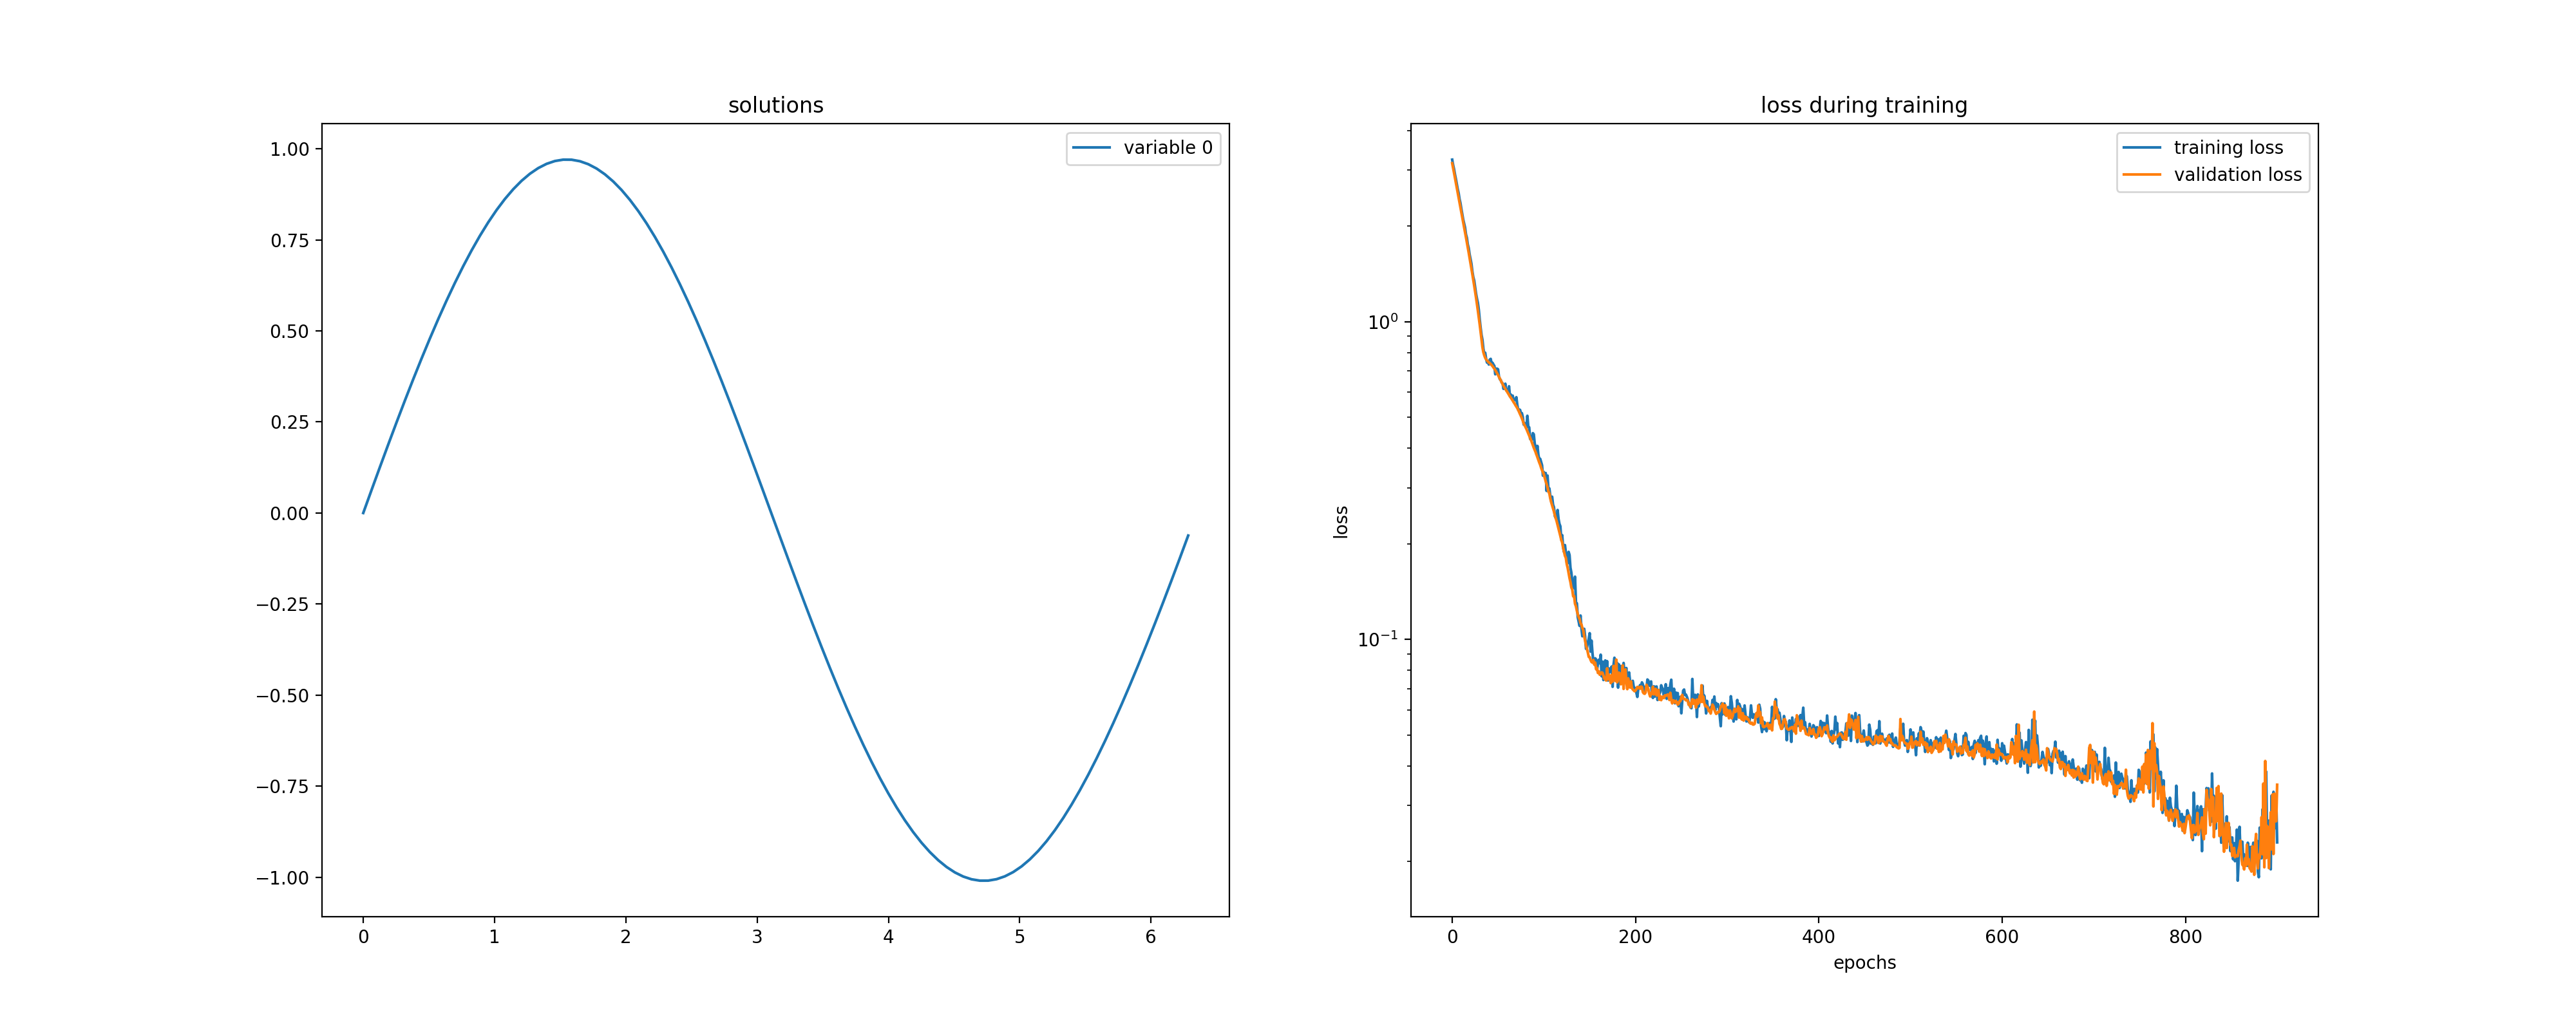

In [26]:
# solve the ODE
solution_ho, _ = solve(ode=harmonic_oscillator, condition=init_val_ho, 
                       t_min=0.0, t_max=2*np.pi,
                       criterion=L1Loss(),
                       monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

It is the same with an ODE system:

<IPython.core.display.Javascript object>


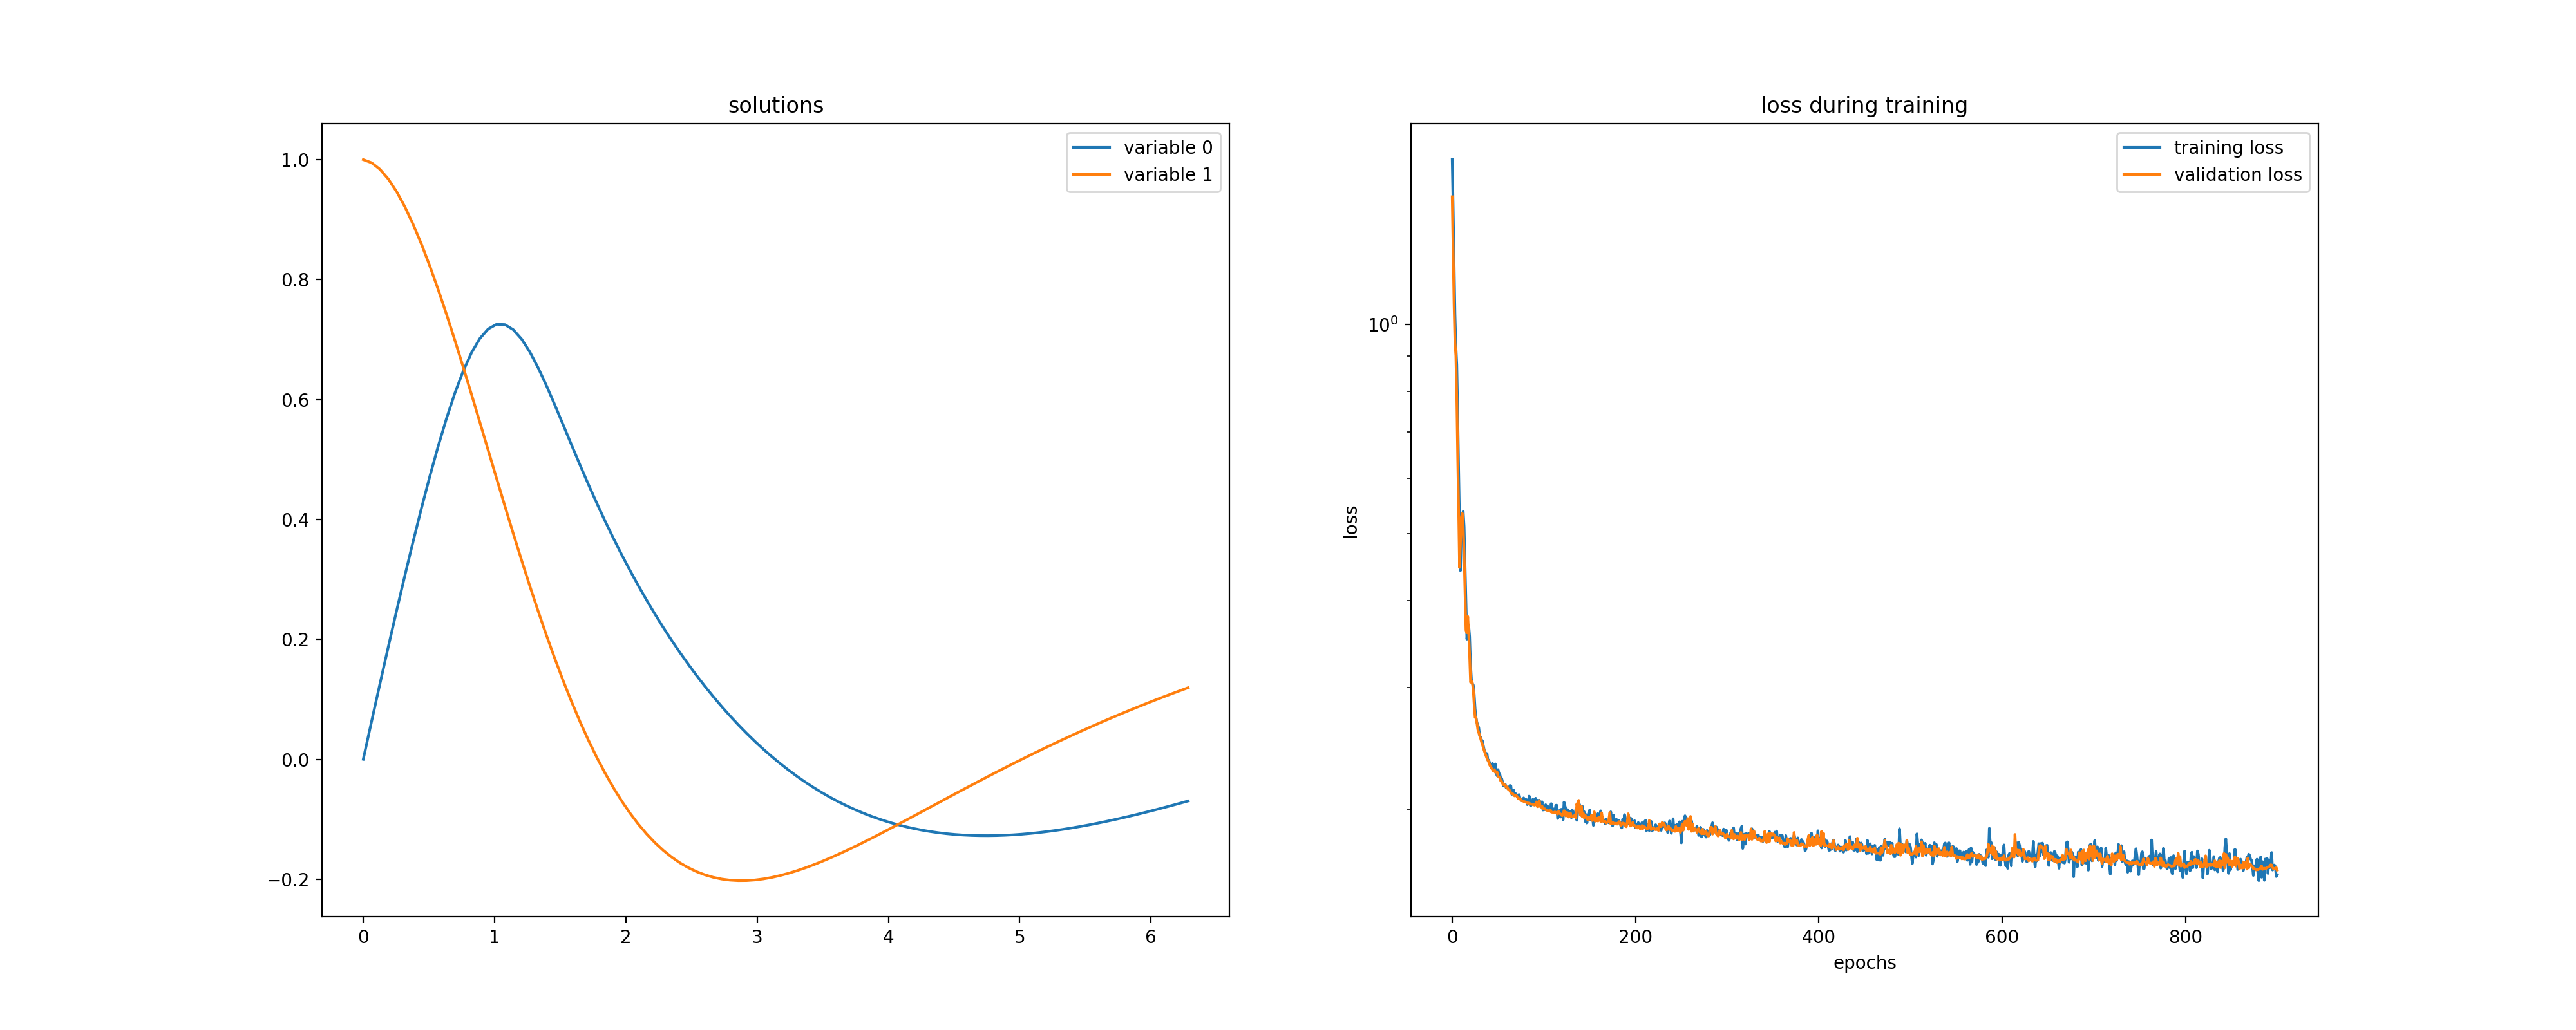

In [27]:
# solve the ODE system
solution_pc, _ = solve_system(ode_system=parametric_circle, 
                              conditions=init_vals_pc, 
                              t_min=0.0, t_max=2*np.pi,
                              criterion=L1Loss(), 
                              monitor=Monitor(t_min=0.0, t_max=2*np.pi, check_every=100))

---

# 3. Access the Internals

When the network, example generator, optimizer and loss function are specified outside `solve` and `solve_system` function, users will naturally have access to these objects. We may still want to access these objects when we are using default network architecture, example generator, optimizer and loss function. We can get these internal objects by setting the `return_internal` keyword to `True`. This will add a third element in the returned tuple, which is a dictionary containing the reference to the network, example generator, optimizer and loss function.

In [28]:
# specify the ODE system
parametric_circle = lambda x1, x2, t : [diff(x1, t) - x2, 
                                        diff(x2, t) + x1]
# specify the initial conditions
init_vals_pc = [
    IVP(t_0=0.0, x_0=0.0),
    IVP(t_0=0.0, x_0=1.0)
]

# solve the ODE system
solution_pc, _, internal = solve_system(
    ode_system=parametric_circle, 
    conditions=init_vals_pc, 
    t_min=0.0, t_max=2*np.pi,
    return_internal=True
)

In [29]:
internal

{'nets': [FCNN(
    (NN): Sequential(
      (0): Linear(in_features=1, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=1, bias=True)
    )
  ), FCNN(
    (NN): Sequential(
      (0): Linear(in_features=1, out_features=32, bias=True)
      (1): Tanh()
      (2): Linear(in_features=32, out_features=32, bias=True)
      (3): Tanh()
      (4): Linear(in_features=32, out_features=1, bias=True)
    )
  )],
 'conditions': [<neurodiffeq.ode.IVP at 0x1028aa6a0>,
 'train_generator': <neurodiffeq.ode.ExampleGenerator at 0x11e0fac50>,
 'valid_generator': <neurodiffeq.ode.ExampleGenerator at 0x11e0fa7f0>,
 'optimizer': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     eps: 1e-08
     lr: 0.001
     weight_decay: 0
 ),
 'criterion': MSELoss()}